In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [13]:
data_path = os.path.join("..", "data")

dir_store_path = os.path.join(data_path, "temporary results")

full_dataset_path = os.path.join(dir_store_path, "overall_dataset.xlsx")

In [14]:
dataset_df = pd.read_excel(full_dataset_path)

In [15]:
dataset_df

Unnamed: 0            DateTime Site  Bottle  Sample  \
0             0 2023-02-07 08:18:00    D       1       0   
1             1 2023-02-07 08:18:00    D       2       0   
2             2 2023-02-14 09:55:00    D       1       0   
3             3 2023-02-14 09:55:00    D       2       0   
4             4 2023-02-21 16:10:00    D       1       0   
..          ...                 ...  ...     ...     ...   
318         318 2023-09-04 10:15:00    A       2       2   
319         319 2023-09-04 12:11:00    E       2       1   
320         320 2023-09-04 12:11:00    E       2       2   
321         321 2023-09-05 10:26:00    A       2       2   
322         322 2023-09-06 10:41:00    A       1       1   

    Technician Water Quality Technician Counting  Temp C_mean  Ph_mean  \
0                      Randa               Randa          6.0     8.10   
1                      Randa               Randa          6.0     8.20   
2                      Randa               Randa          9.0     7.80   
3                      Randa               Randa          8.0     8.00   
4                      Randa               Randa         11.0     8.00   
..                       ...                 ...          ...      ...   
318                      NaN               Admin         21.8     7.92   
319                      NaN               Admin         22.0     7.60   
320                      NaN               Admin         22.0     7.60   
321                      NaN               Admin         22.0     7.60   
322                      NaN               Admin         23.0     7.70   

     Cond (ms)_mean Coliform (1ml)_mean Ecoli (1ml)_mean  cso_active  \
0          0.800000                  16                6       False   
1          0.770000                  10                6       False   
2          0.800000                  11                5       False   
3          0.800000                  22                7       False   
4          1.250000                  19                6       False   
..              ...                 ...              ...         ...   
318        2.730000                   0               46       False   
319        1.680000                   0               24       False   
320        1.680000                   0               18       False   
321        2.093750                TNTC             TNTC       False   
322        2.296875                   0                8       False   

     Deptford_rainfall_6h  Holland Park_rainfall_6h  Putney Heath_rainfall_6h  \
0                     0.0                       0.0                       0.0   
1                     0.0                       0.0                       0.0   
2                     0.0                       0.0                       0.0   
3                     0.0                       0.0                       0.0   
4                     0.0                       0.0                       0.0   
..                    ...                       ...                       ...   
318                   0.0                       0.8                       0.0   
319                   0.0                       0.8                       0.0   
320                   0.0                       0.8                       0.0   
321                   0.0                       0.0                       0.0   
322                   0.0                       0.0                       0.0   

     Hogsmill Valley_rainfall_6h TideType  
0                            0.0     high  
1                            0.0     high  
2                            0.0   normal  
3                            0.0   normal  
4                            0.0     high  
..                           ...      ...  
318                          0.0      low  
319                          0.0   normal  
320                          0.0   normal  
321                          0.0      low  
322                          0.0      low  

[323 rows x 18 columns]

### Get TNTC samples

In [16]:
tntc_df = dataset_df[
    (dataset_df["Coliform (1ml)_mean"] == "TNTC")
    | (dataset_df["Ecoli (1ml)_mean"] == "TNTC")
    | (dataset_df["Coliform (1ml)_mean"] == 0)
]

In [17]:
tntc_df

Unnamed: 0            DateTime Site  Bottle  Sample  \
52           52 2023-08-09 15:30:00    D       2       2   
258         258 2023-08-02 10:20:00    B       1       1   
259         259 2023-08-02 10:20:00    B       1       1   
260         260 2023-08-02 10:20:00    B       1       1   
261         261 2023-08-02 10:20:00    B       1       2   
..          ...                 ...  ...     ...     ...   
318         318 2023-09-04 10:15:00    A       2       2   
319         319 2023-09-04 12:11:00    E       2       1   
320         320 2023-09-04 12:11:00    E       2       2   
321         321 2023-09-05 10:26:00    A       2       2   
322         322 2023-09-06 10:41:00    A       1       1   

    Technician Water Quality Technician Counting  Temp C_mean  Ph_mean  \
52                      Anan                 Vee         22.0     7.80   
258            Anan - Alisha               Randa         20.0     7.70   
259            Anan - Alisha               Randa         20.0     7.70   
260            Anan - Alisha               Randa         20.0     7.70   
261            Anan - Alisha               Randa         20.0     7.70   
..                       ...                 ...          ...      ...   
318                      NaN               Admin         21.8     7.92   
319                      NaN               Admin         22.0     7.60   
320                      NaN               Admin         22.0     7.60   
321                      NaN               Admin         22.0     7.60   
322                      NaN               Admin         23.0     7.70   

     Cond (ms)_mean Coliform (1ml)_mean Ecoli (1ml)_mean  cso_active  \
52         0.800000                   0                6       False   
258        0.790000                TNTC             TNTC       False   
259        0.790000                TNTC             TNTC       False   
260        0.790000                TNTC             TNTC       False   
261        0.790000                TNTC             TNTC       False   
..              ...                 ...              ...         ...   
318        2.730000                   0               46       False   
319        1.680000                   0               24       False   
320        1.680000                   0               18       False   
321        2.093750                TNTC             TNTC       False   
322        2.296875                   0                8       False   

     Deptford_rainfall_6h  Holland Park_rainfall_6h  Putney Heath_rainfall_6h  \
52                    0.0                       0.0                       0.0   
258                   0.0                       4.6                       1.1   
259                   0.0                       4.6                       1.1   
260                   0.0                       4.6                       1.1   
261                   0.0                       4.6                       1.1   
..                    ...                       ...                       ...   
318                   0.0                       0.8                       0.0   
319                   0.0                       0.8                       0.0   
320                   0.0                       0.8                       0.0   
321                   0.0                       0.0                       0.0   
322                   0.0                       0.0                       0.0   

     Hogsmill Valley_rainfall_6h TideType  
52                           0.0   normal  
258                          0.4   normal  
259                          0.4   normal  
260                          0.4   normal  
261                          0.4   normal  
..                           ...      ...  
318                          0.0      low  
319                          0.0   normal  
320                          0.0   normal  
321                          0.0      low  
322                          0.0      low  

[66 rows x 18 columns]

In [18]:
clean_df = dataset_df.drop(tntc_df.index)

# Per Site Data Visualization and Analysis

In [32]:
analyze_columns = [
    "Temp C_mean",
    "Ph_mean",
    "Cond (ms)_mean",
    "Deptford_rainfall_6h",
    "Holland Park_rainfall_6h",
    "Putney Heath_rainfall_6h",
    "Hogsmill Valley_rainfall_6h",
    "Ecoli (1ml)_mean",
    "Coliform (1ml)_mean",
]

## General Info

In [29]:
site_dict = {}
for site in clean_df["Site"].unique():
    site_dict[site] = clean_df[clean_df["Site"] == site]

In [30]:
for site in site_dict:
    print("Site: ", site)
    print("-" * 30)
    print(site_dict[site].describe().to_string())
    print("\n")
    print(
        "Timespan: "
        + pd.to_datetime(site_dict[site]["DateTime"])
        .min()
        .strftime("%Y-%m-%d %H:%M:%S")
        + " - "
        + pd.to_datetime(site_dict[site]["DateTime"])
        .max()
        .strftime("%Y-%m-%d %H:%M:%S")
    )
    print("\n")

Site:  D
------------------------------
       Unnamed: 0                       DateTime     Bottle     Sample  Temp C_mean    Ph_mean  Cond (ms)_mean  Deptford_rainfall_6h  Holland Park_rainfall_6h  Putney Heath_rainfall_6h  Hogsmill Valley_rainfall_6h
count   71.000000                             71  71.000000  71.000000    71.000000  71.000000       71.000000             71.000000                 71.000000                 71.000000                    71.000000
mean   116.366197  2023-07-16 20:10:56.619718144   1.478873   1.323944    19.077465   7.808451        1.337773              0.008451                  0.081690                  0.040845                     0.025352
min      0.000000            2023-02-07 08:18:00   1.000000   0.000000     6.000000   7.500000        0.720000              0.000000                  0.000000                  0.000000                     0.000000
25%     42.500000            2023-08-09 13:10:00   1.000000   1.000000    20.000000   7.780000        1.

## Correlation Matrix Heatmap

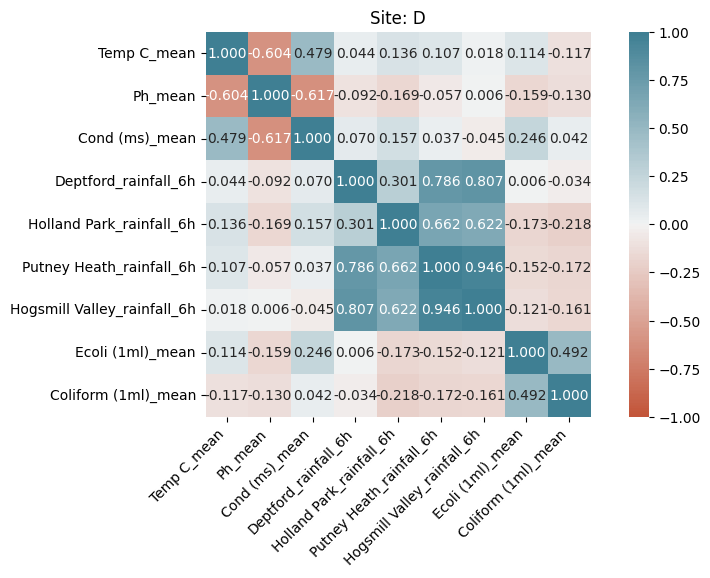

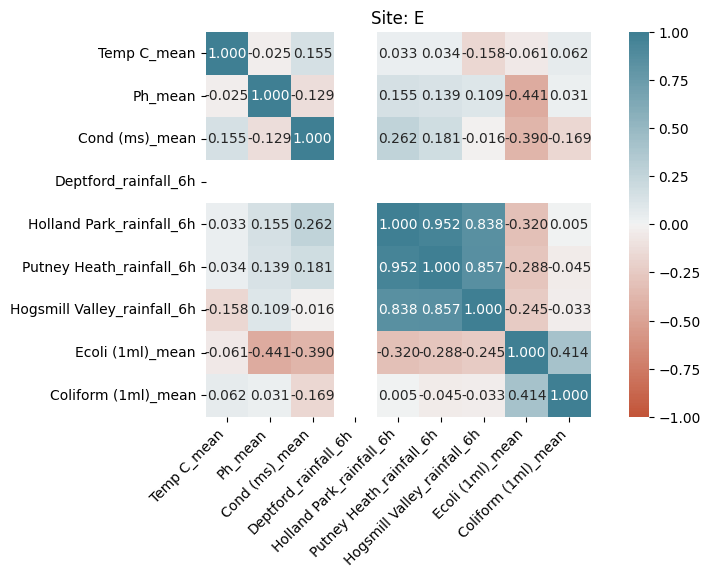

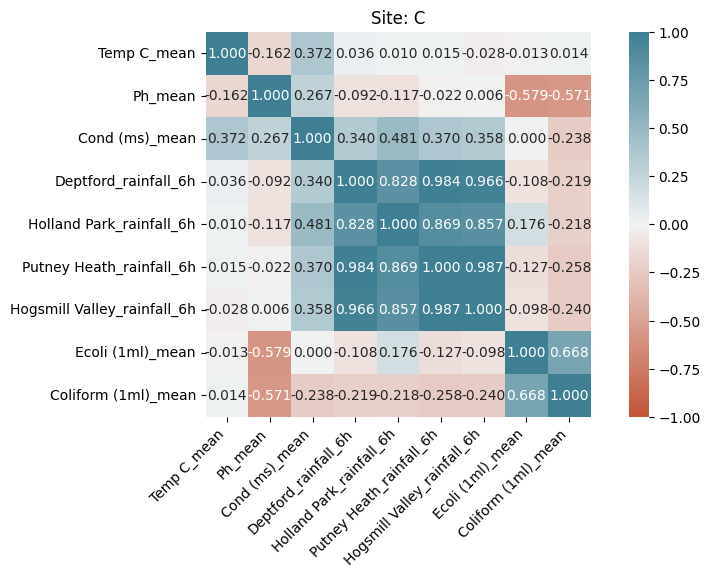

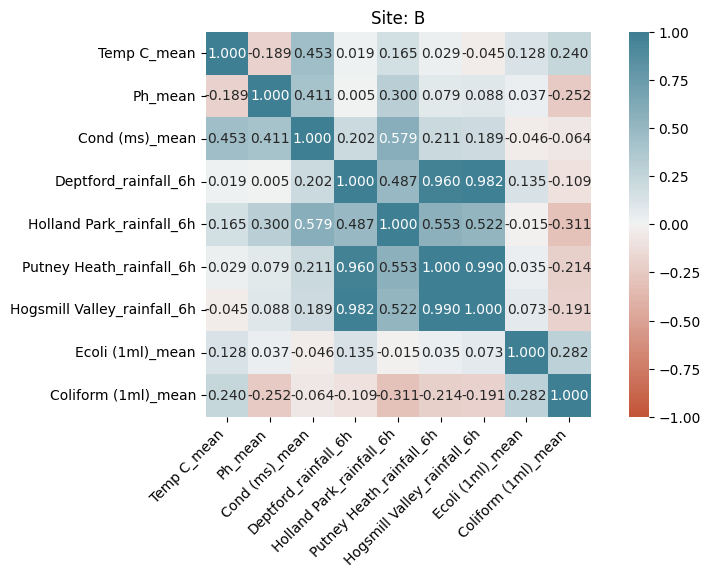

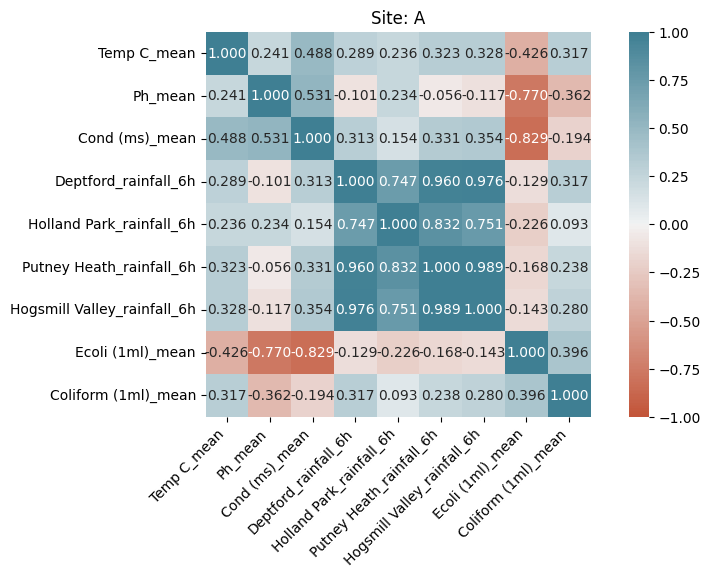

In [34]:
# Pearson, used for two quantitative continuous variables which have a linear relationship
# Spearman, used for two quantitative variables if the link is partially linear, or for one qualitative ordinal variable and one quantitative variable
# Kendall, often used for two qualitative ordinal variables

for site in site_dict:
    corr = site_dict[site][analyze_columns].corr(method="pearson")

    plt.figure(figsize=(10, 5))
    plt.title("Site: " + site)
    ax = sns.heatmap(
        corr,
        vmin=-1,
        vmax=1,
        center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        fmt=".3f",
    )
    ax.set_xticklabels(
        ax.get_xticklabels(), rotation=45, horizontalalignment="right"
    )

## Scatter Plots

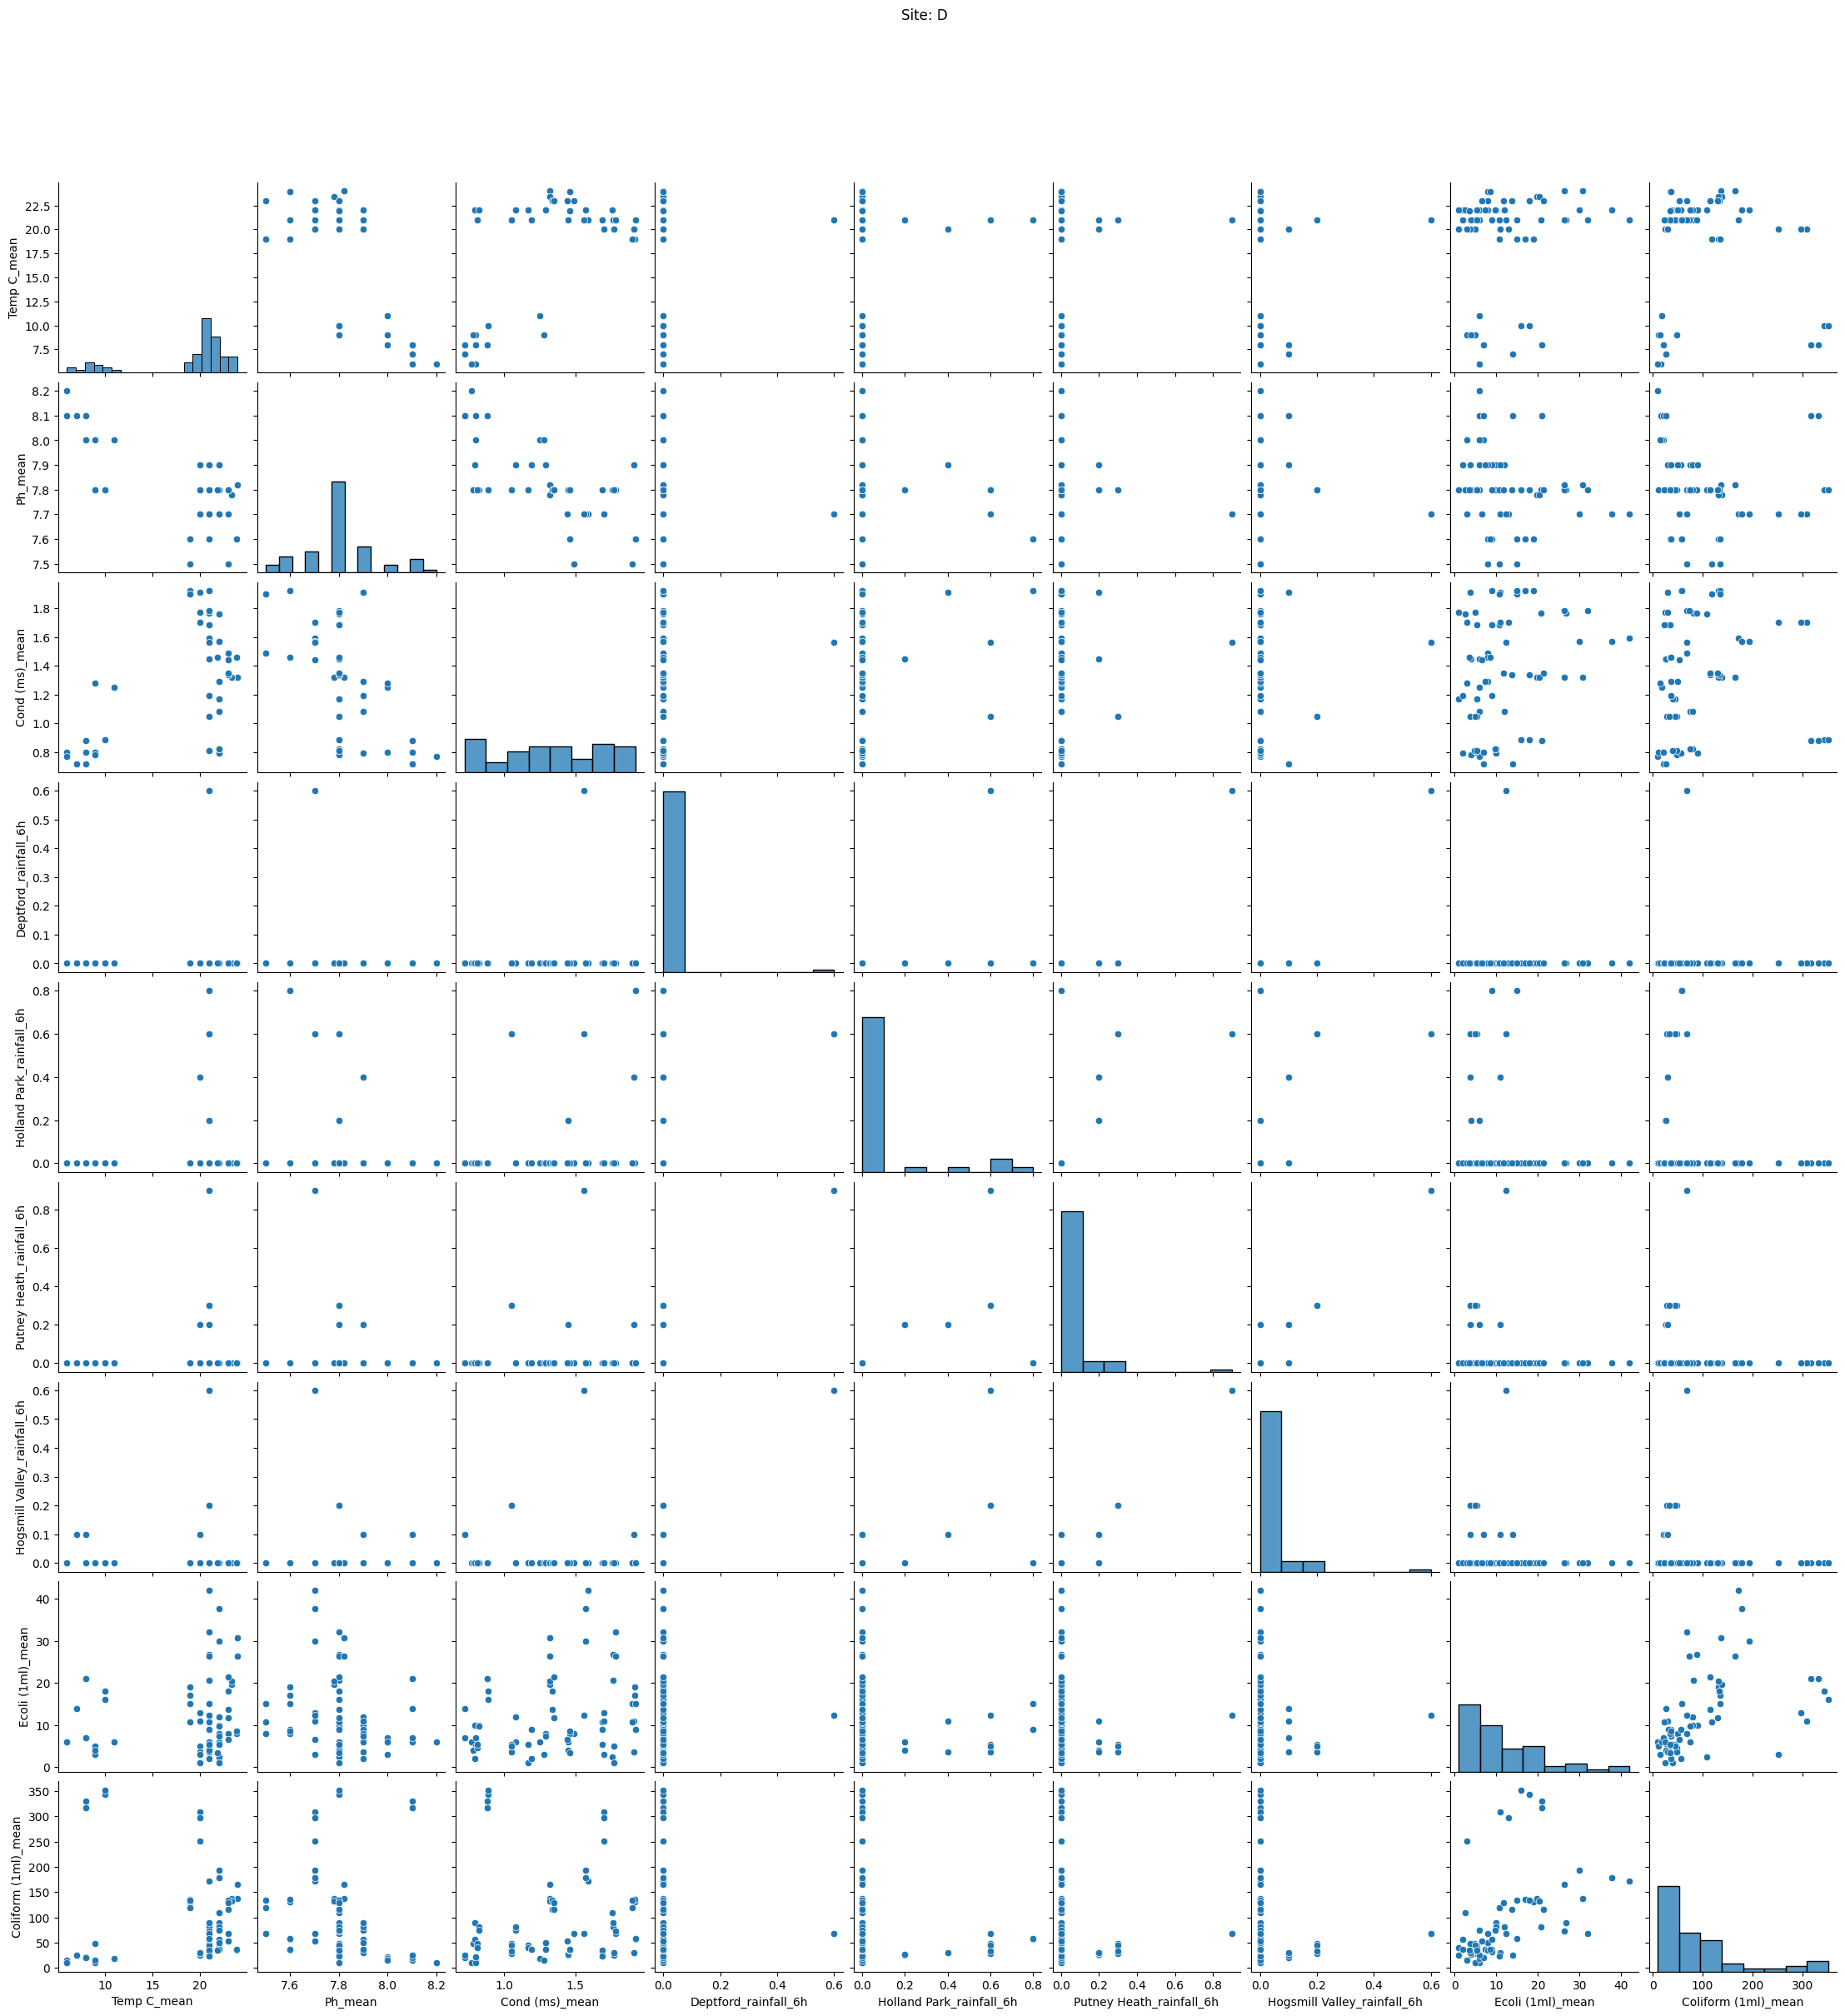

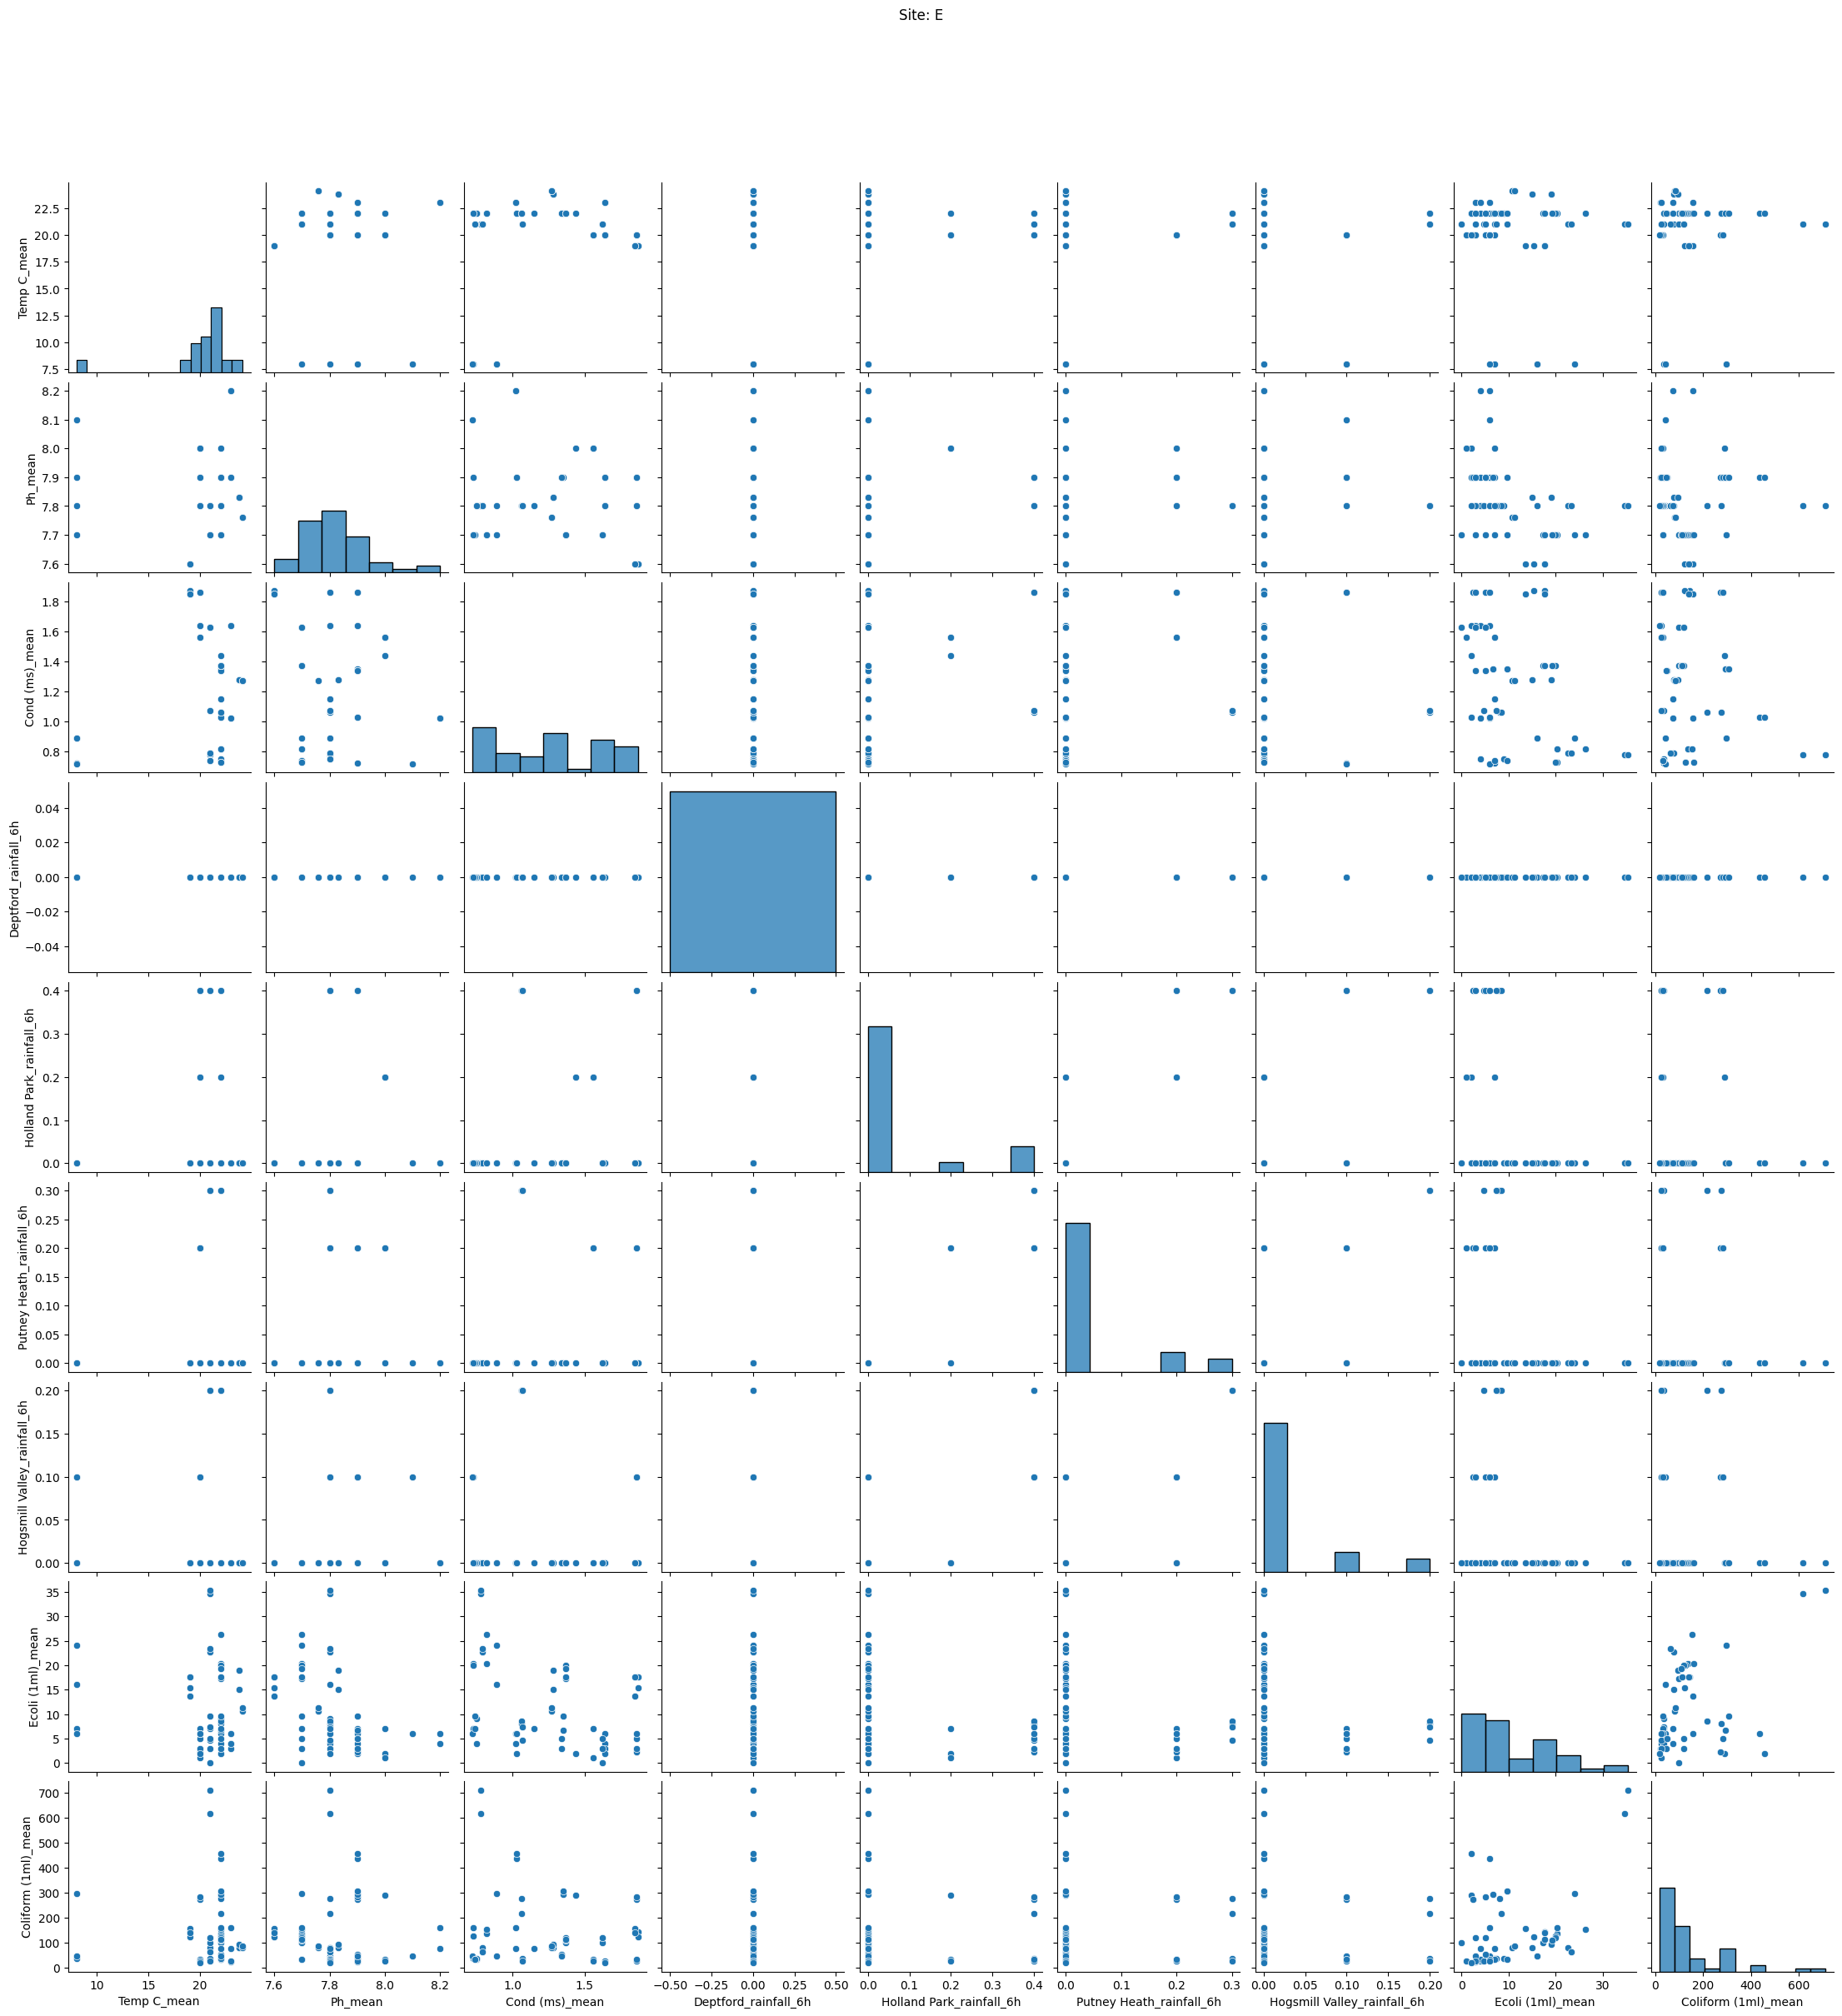

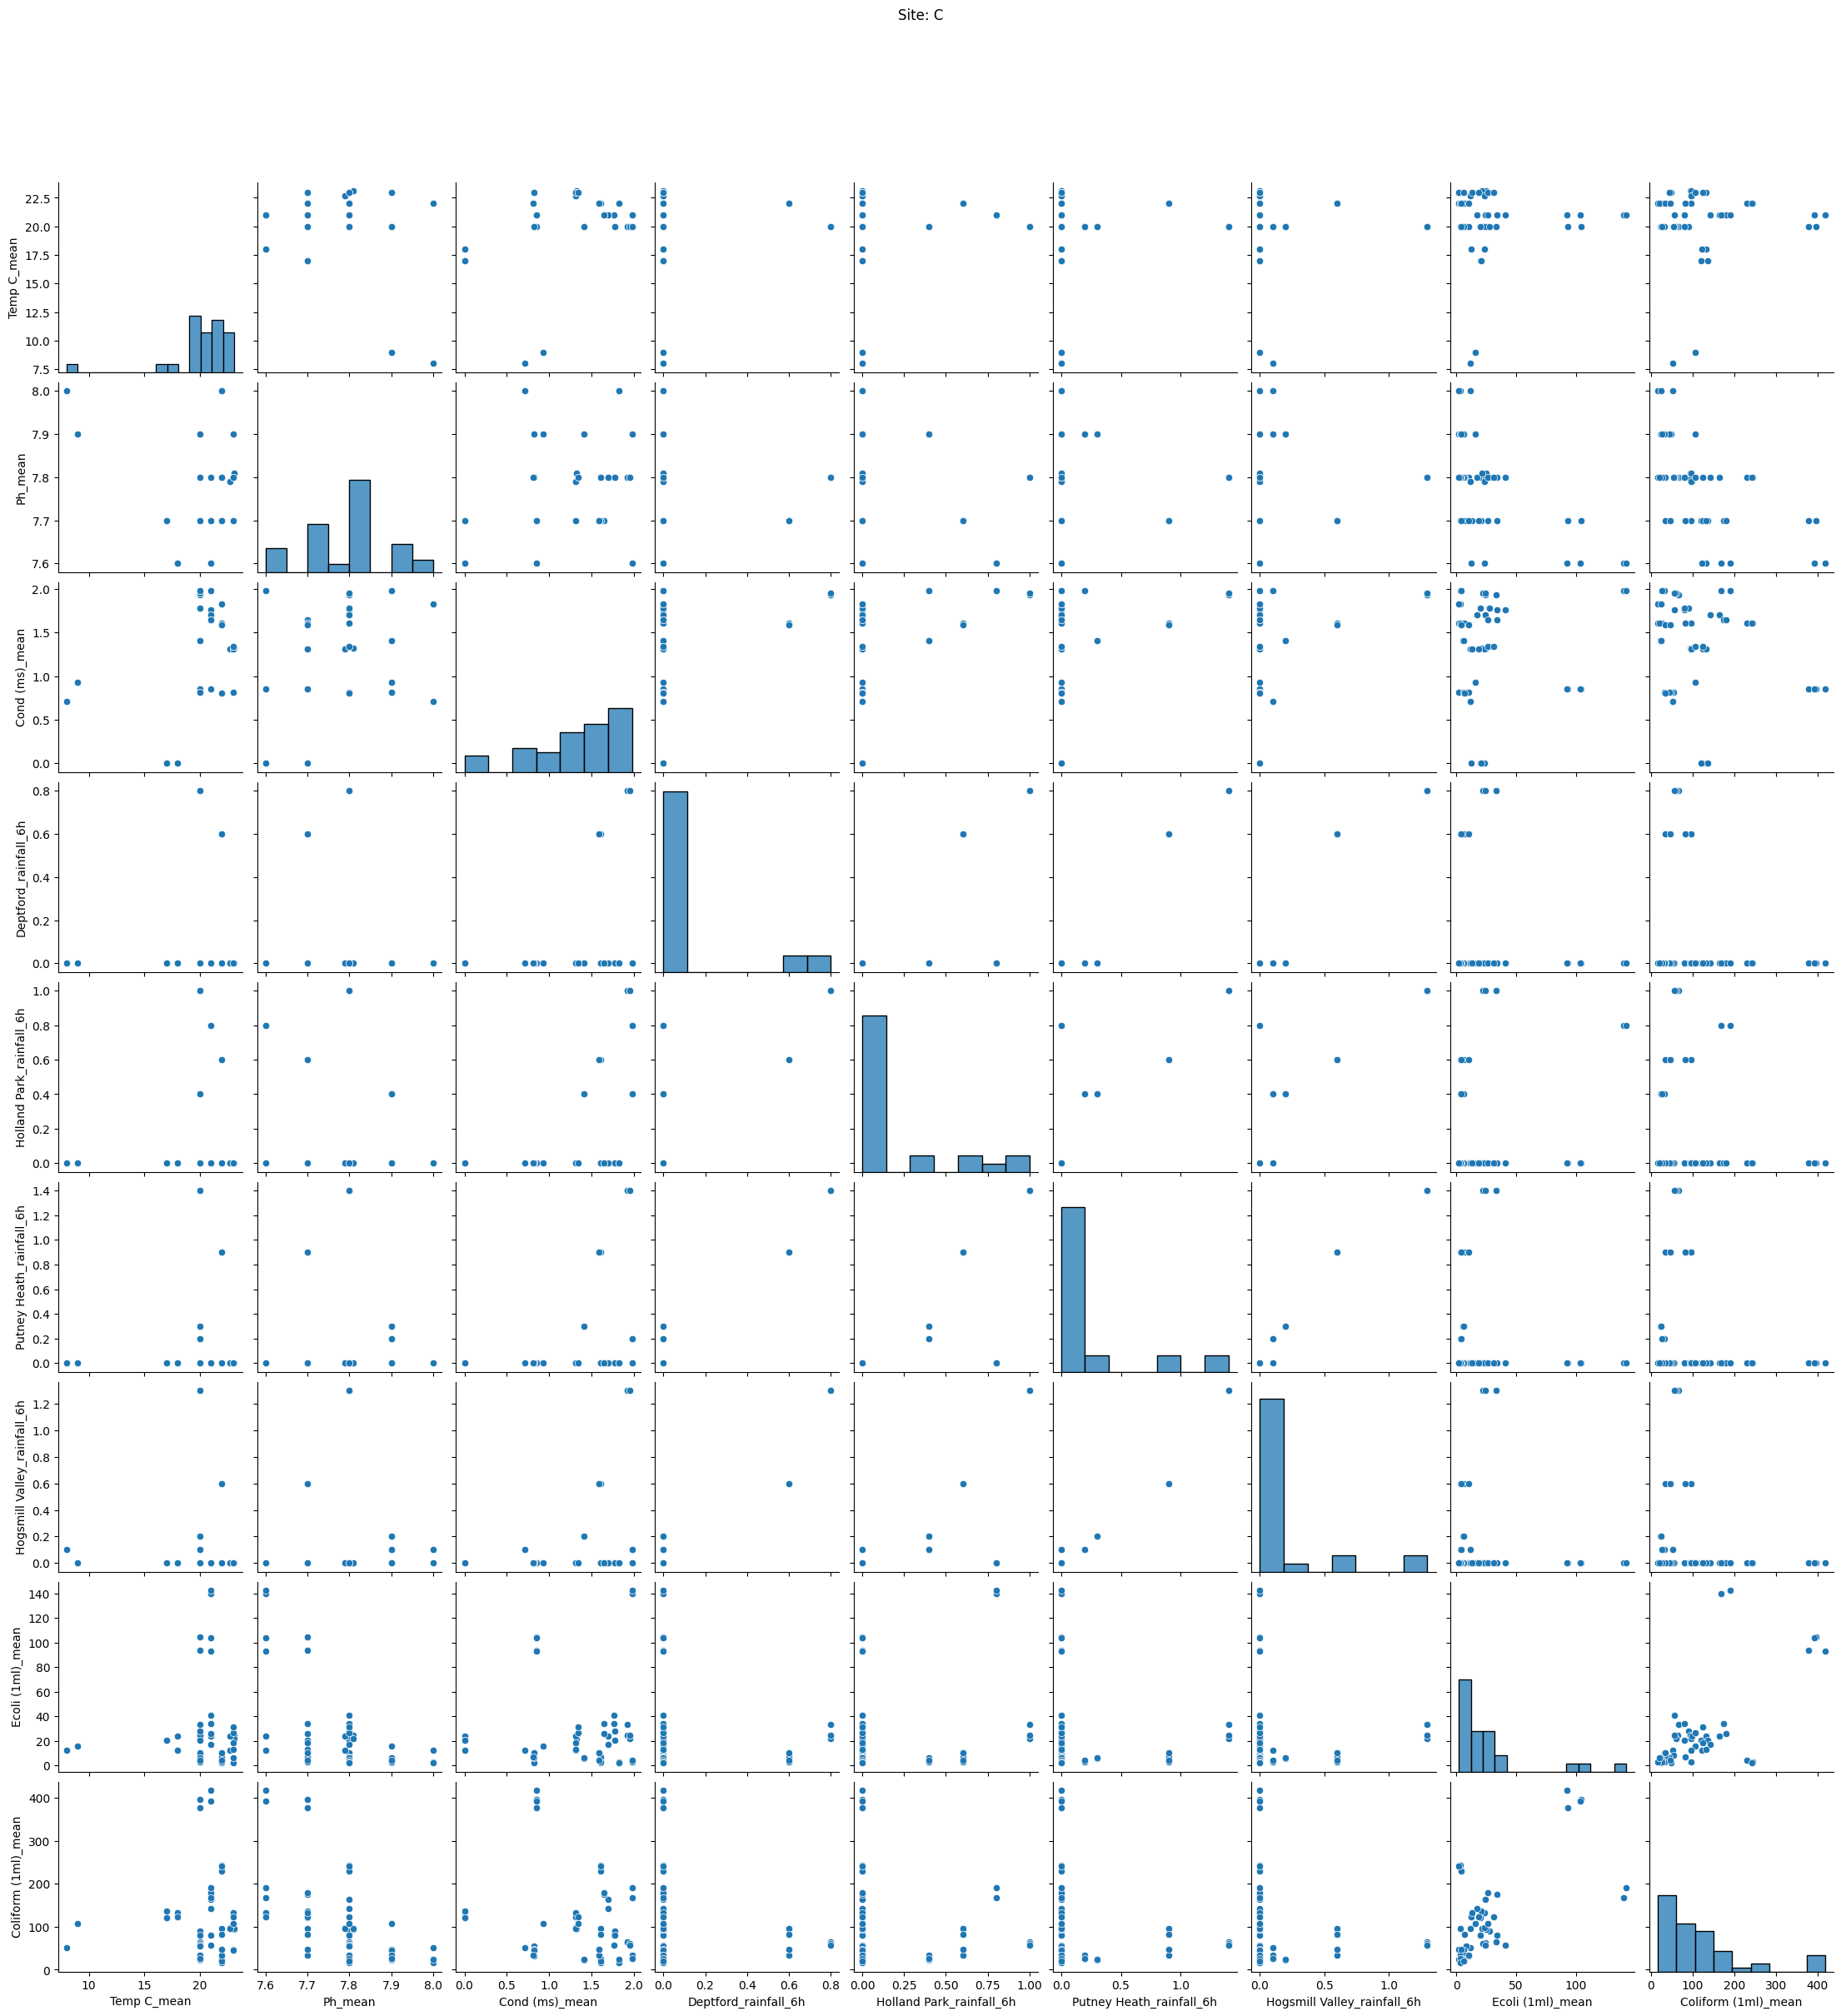

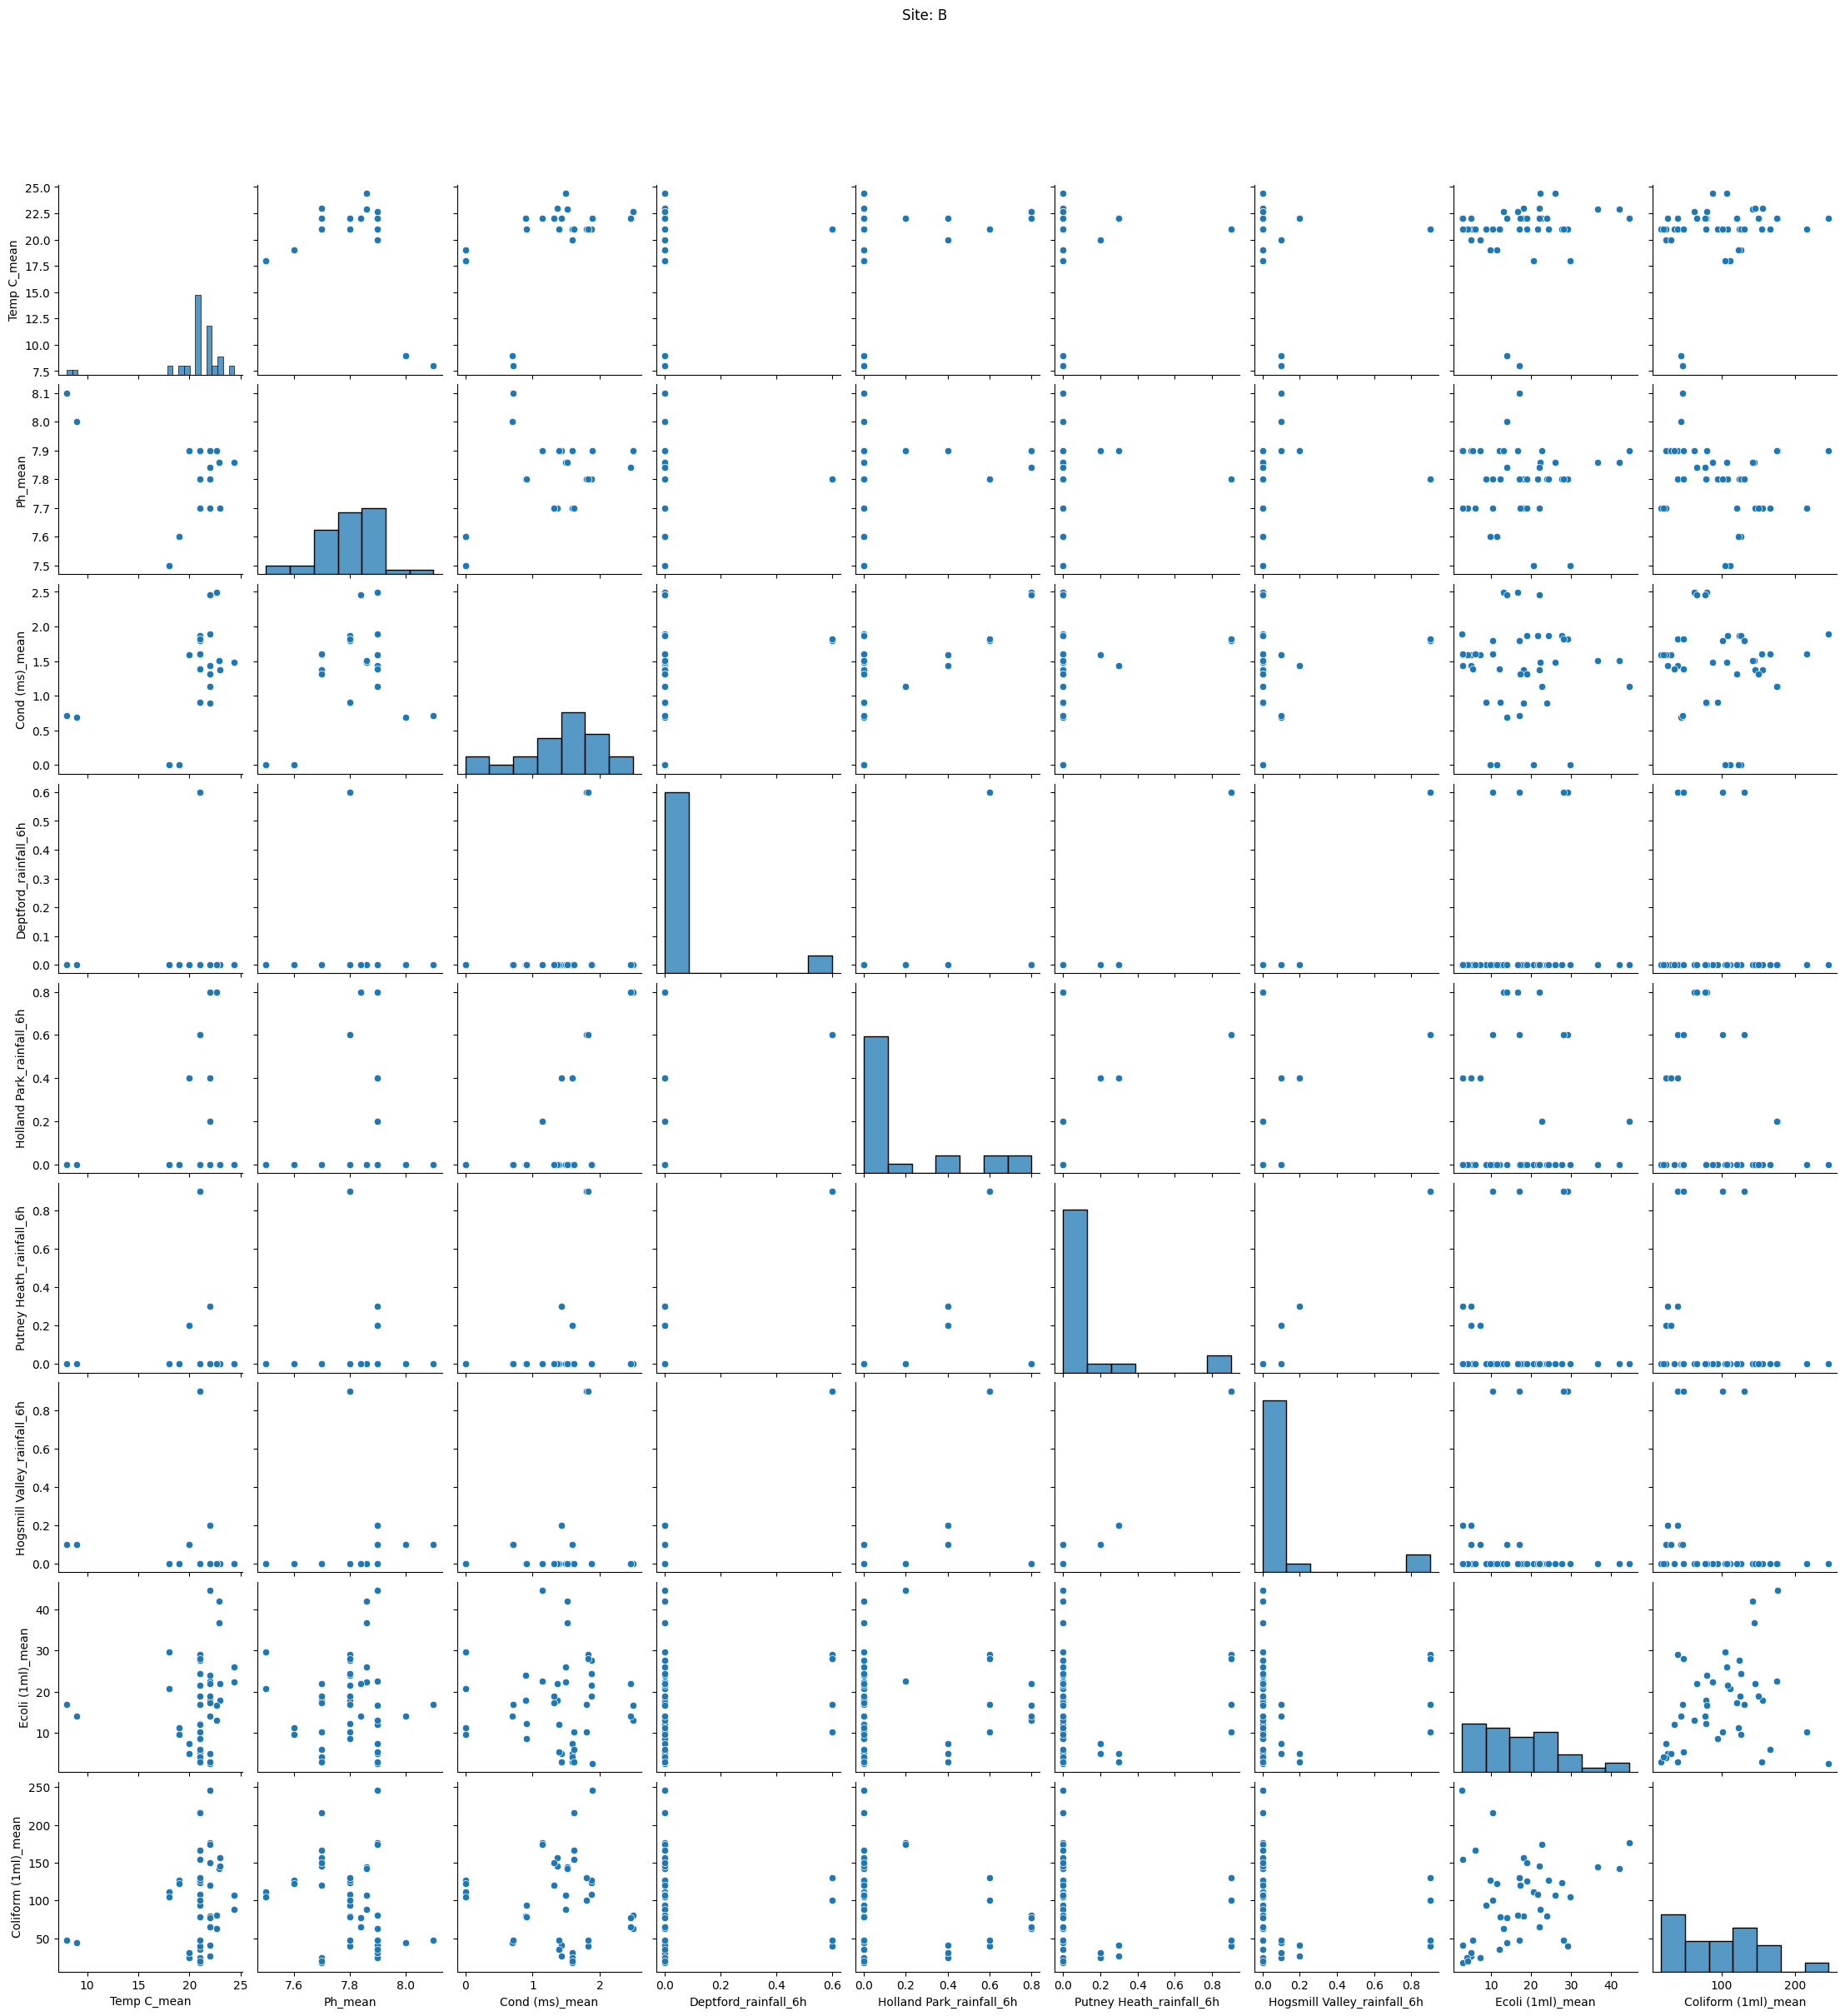

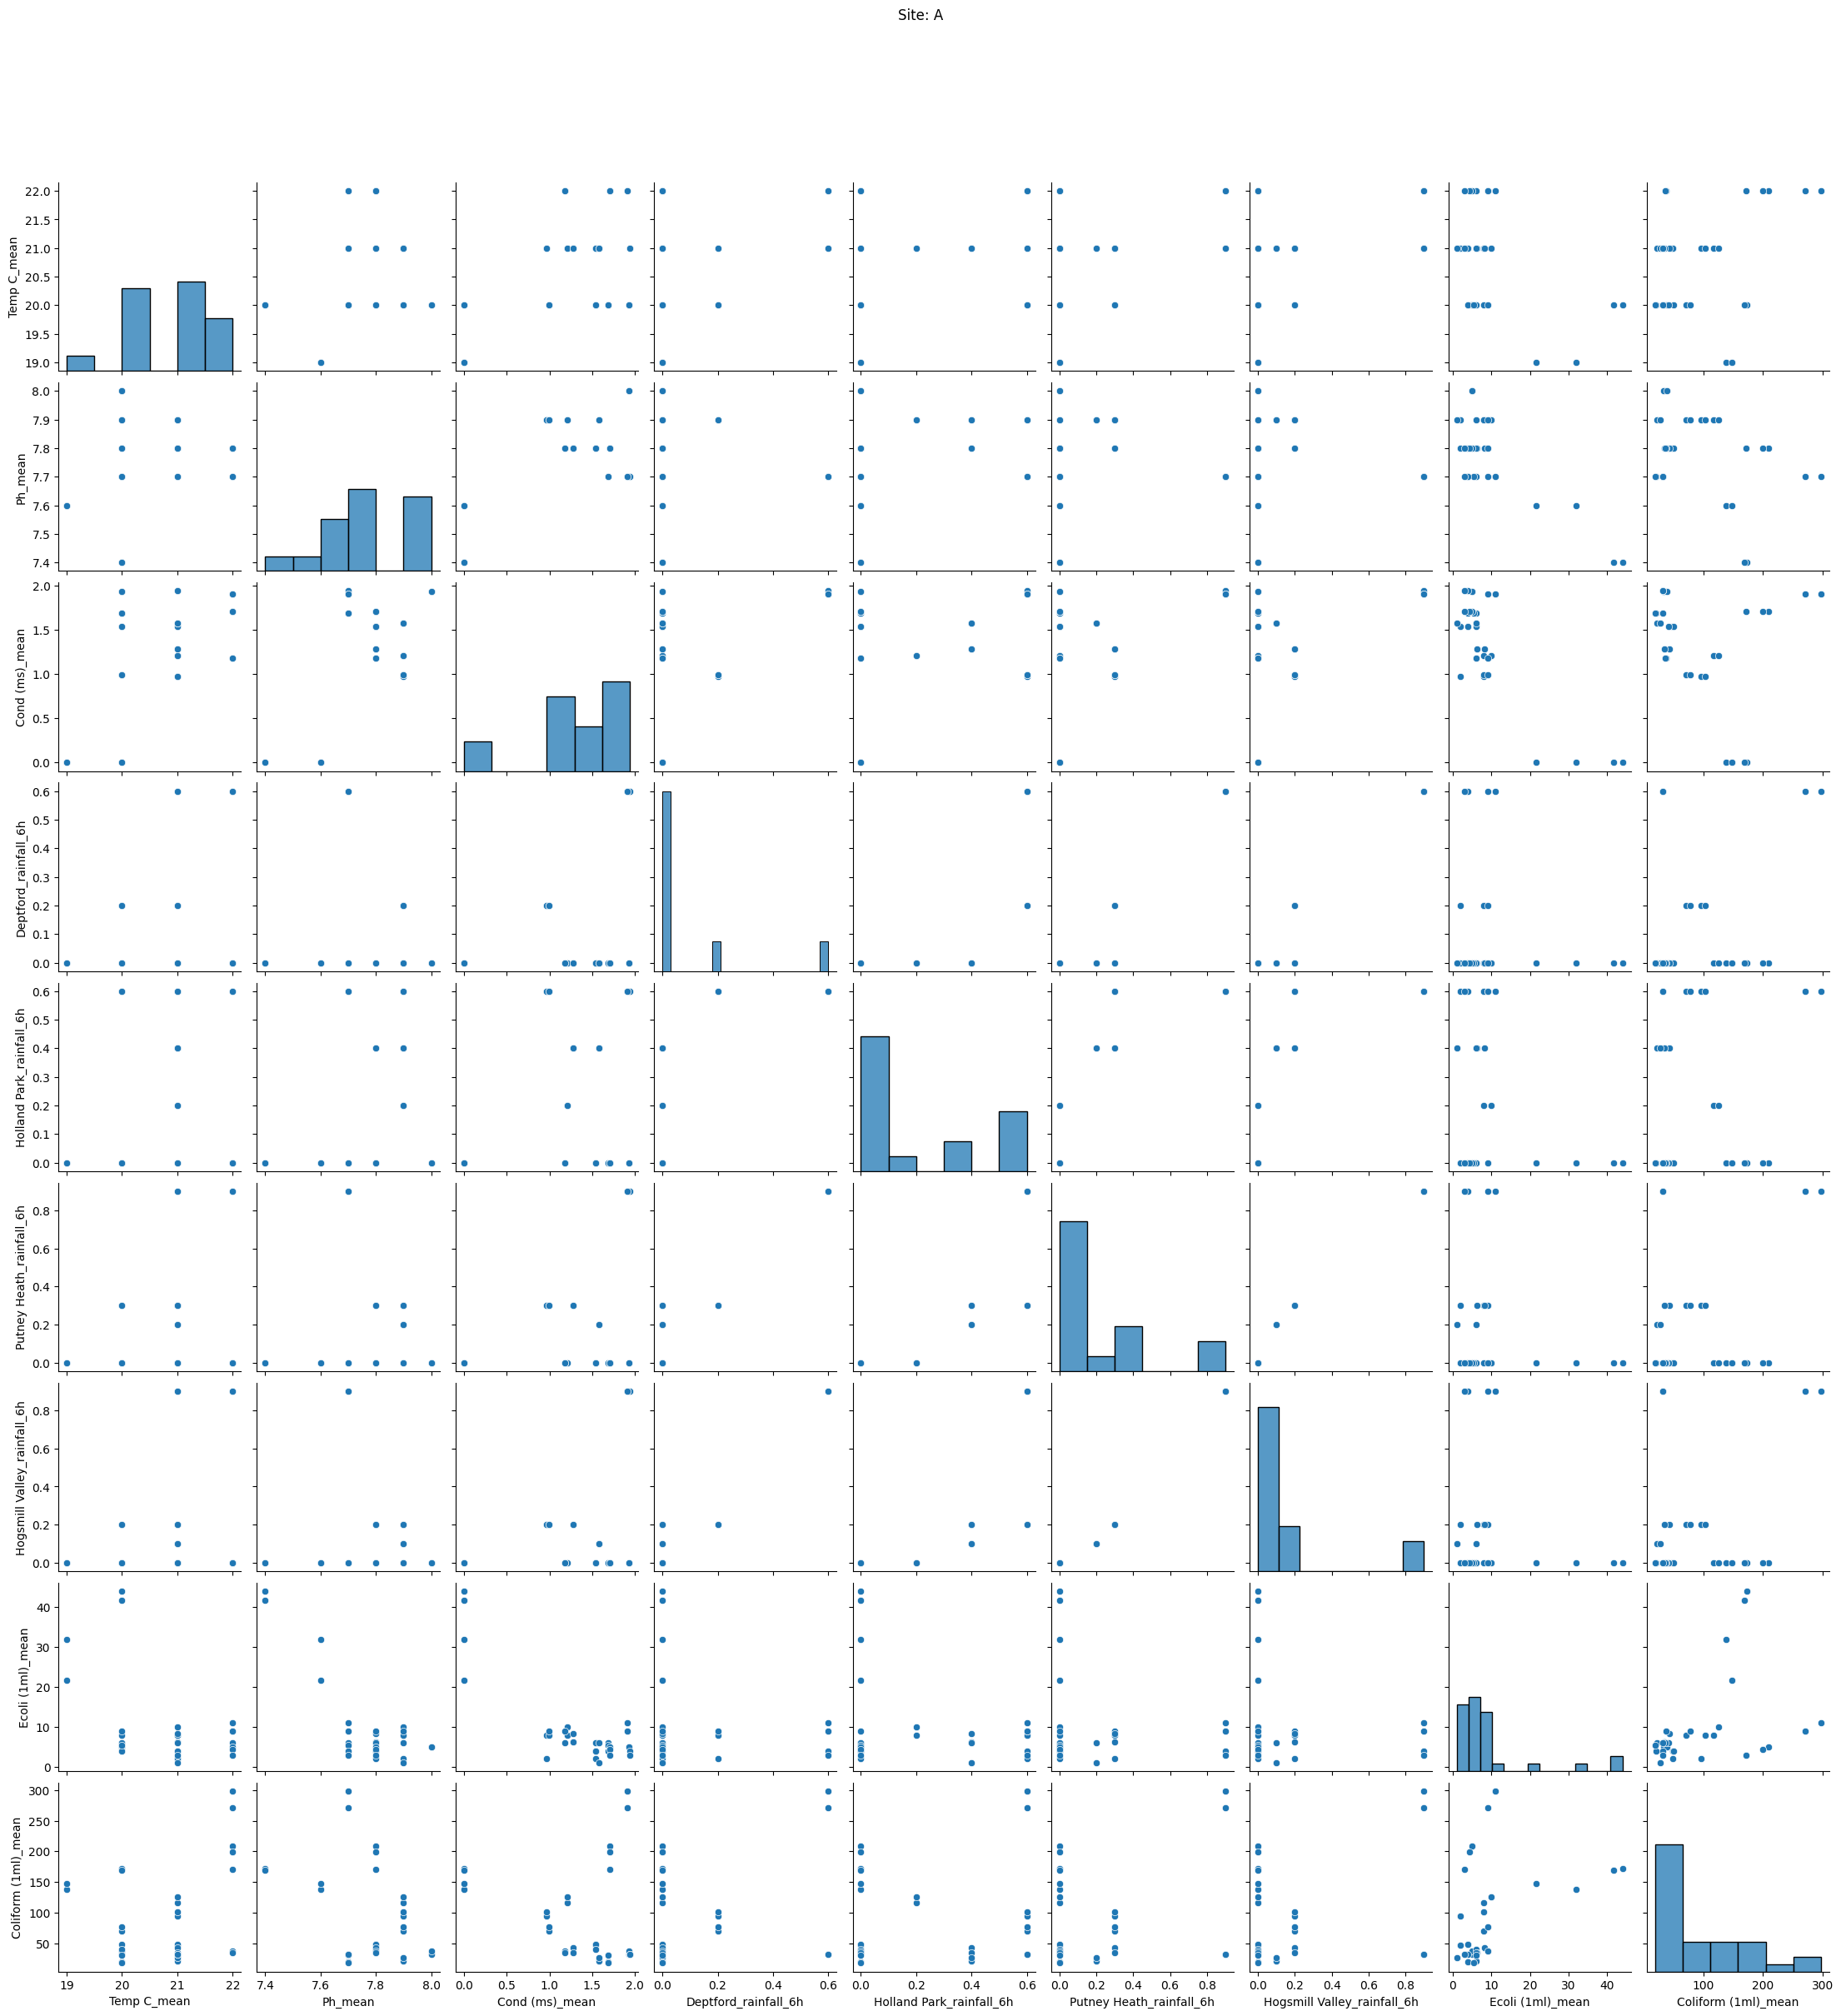

In [35]:
for site in site_dict:
    plot = sns.pairplot(data=site_dict[site][analyze_columns])
    plot.fig.suptitle("Site: " + site, y=1.08)

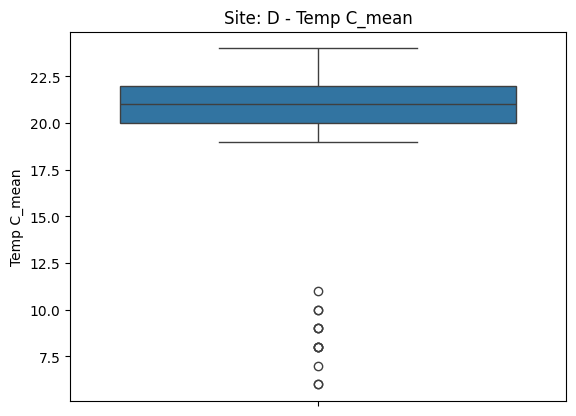

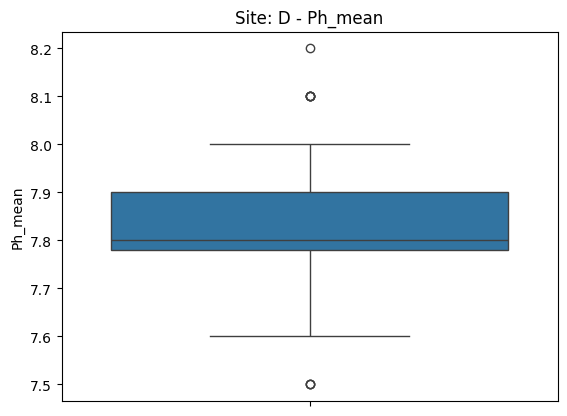

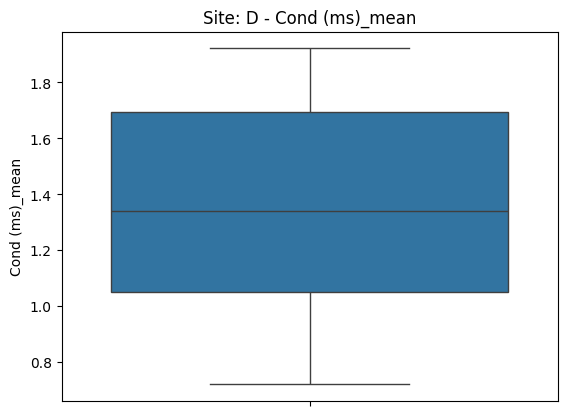

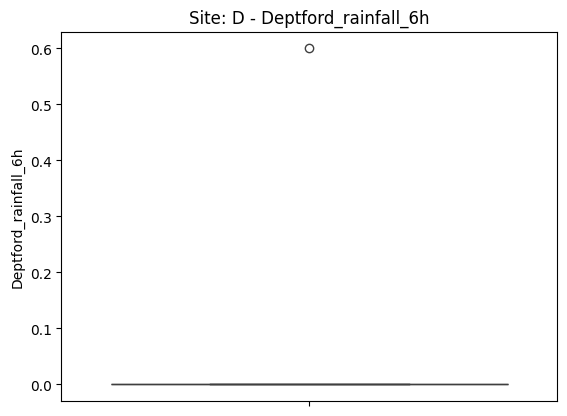

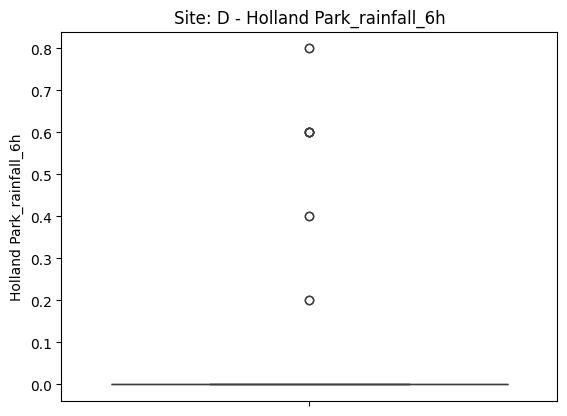

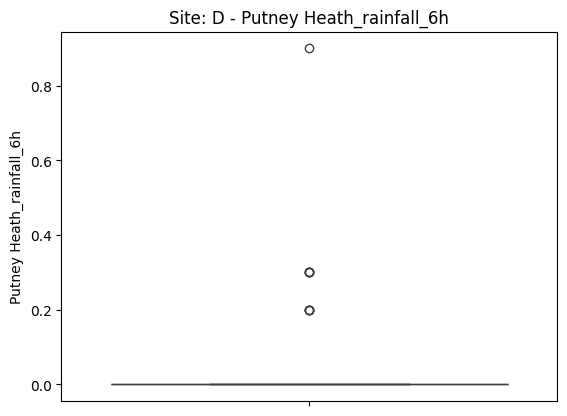

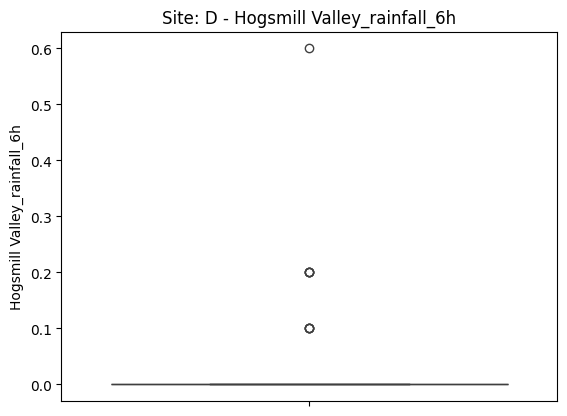

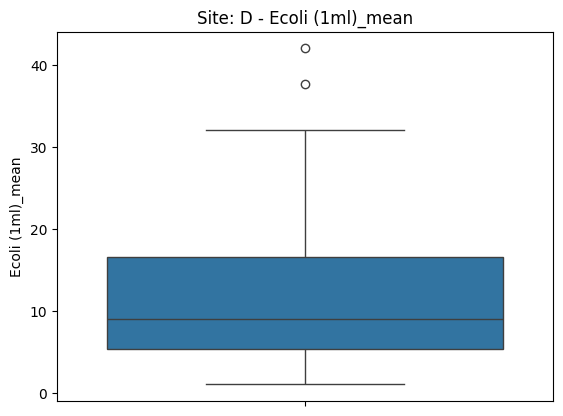

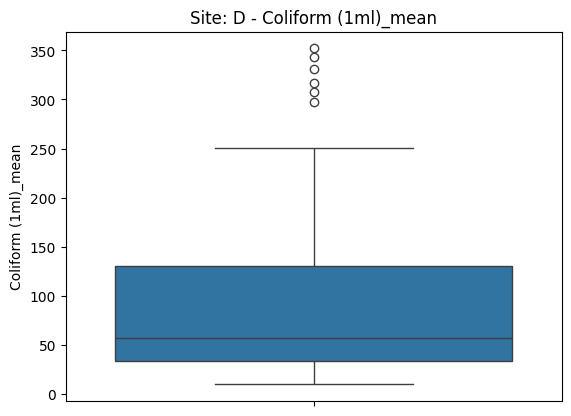

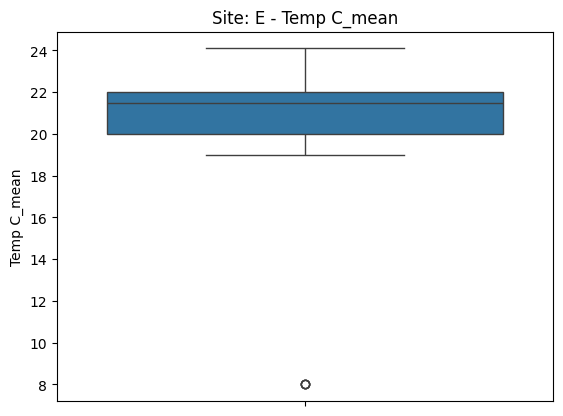

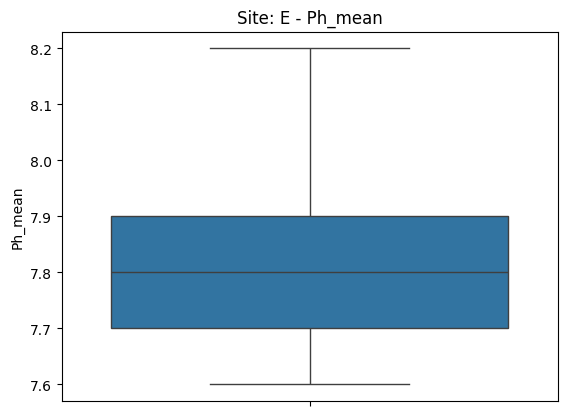

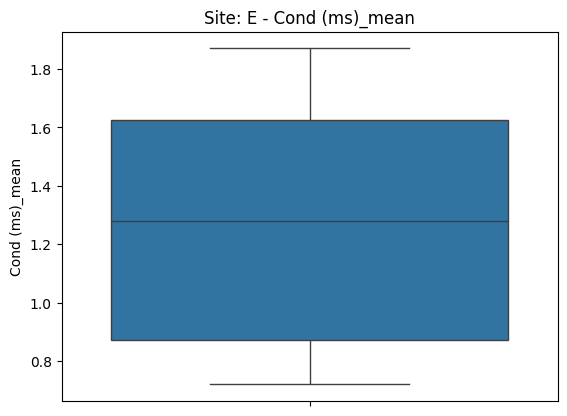

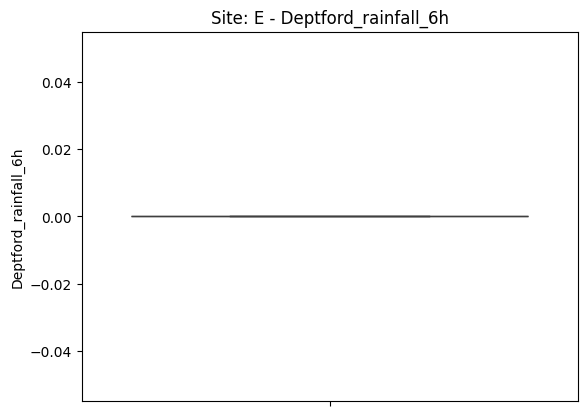

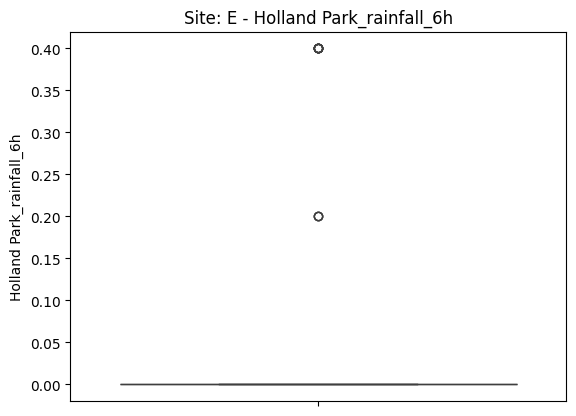

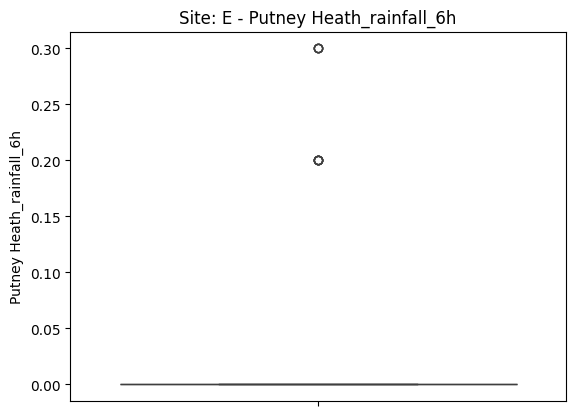

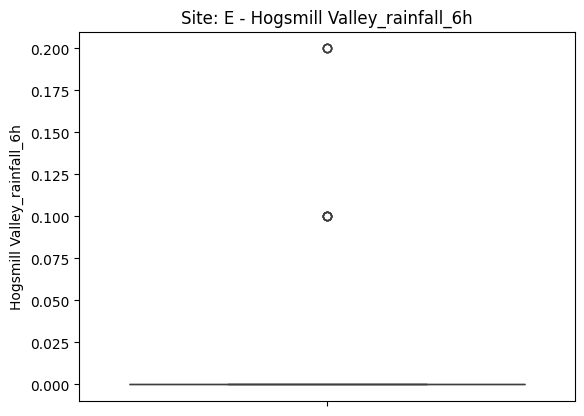

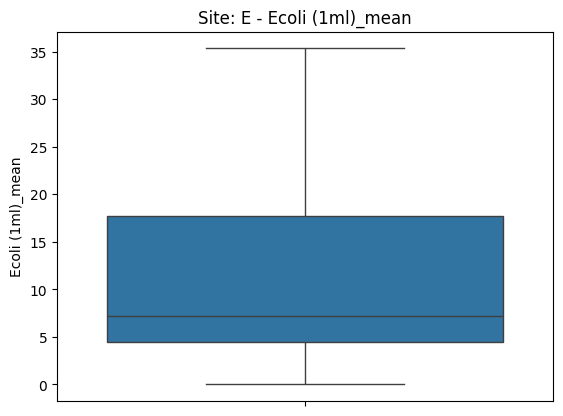

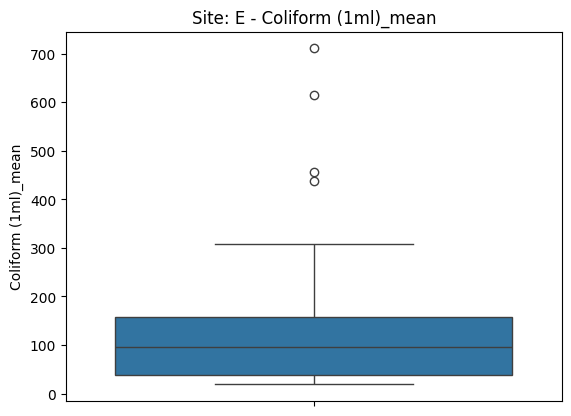

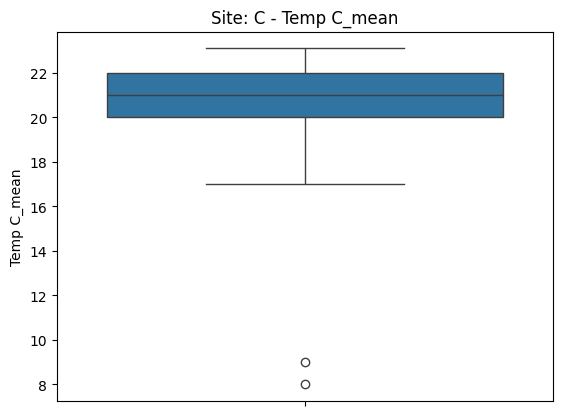

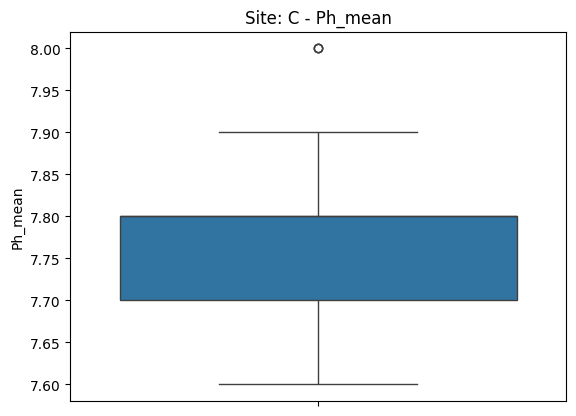

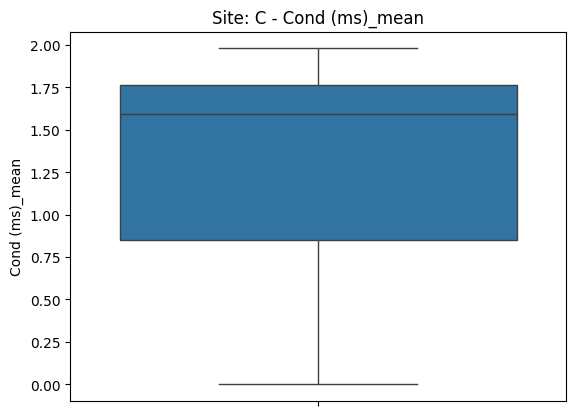

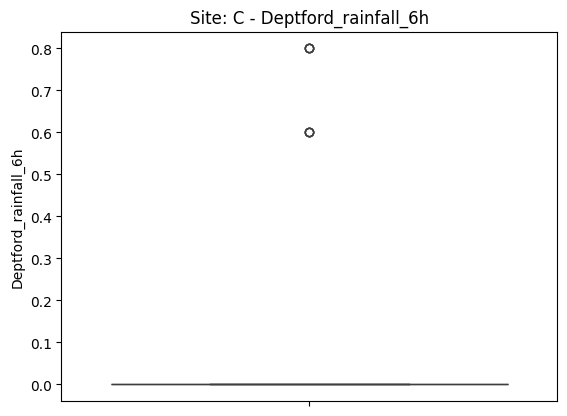

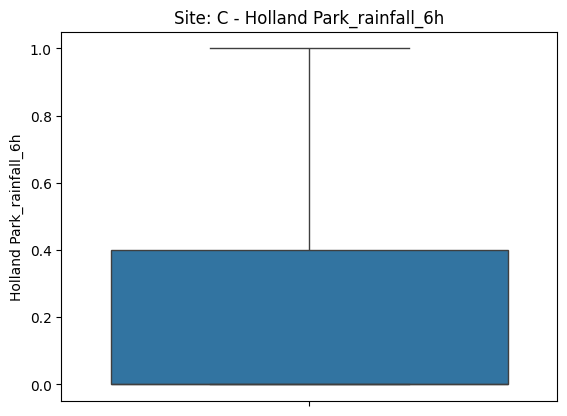

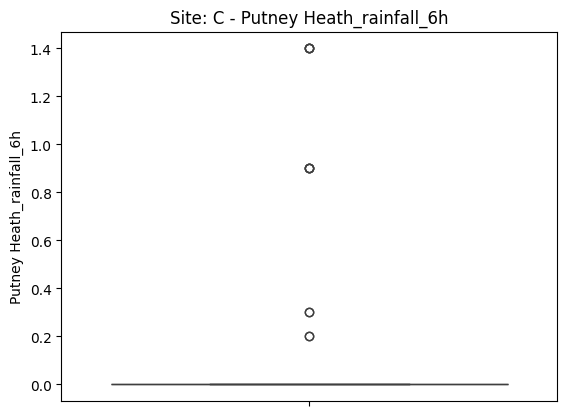

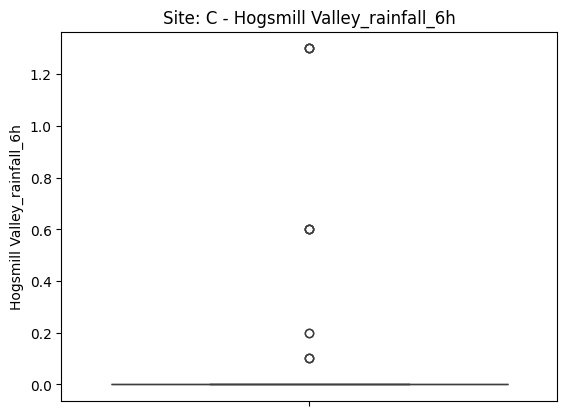

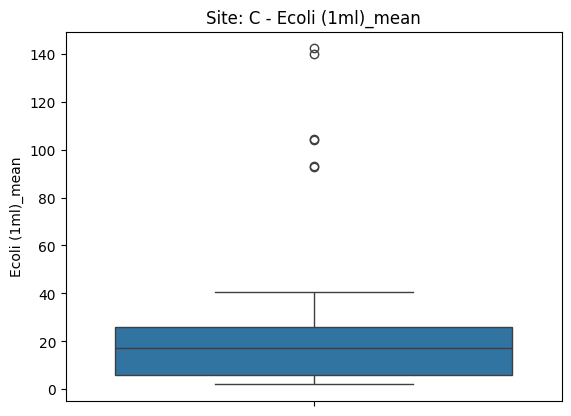

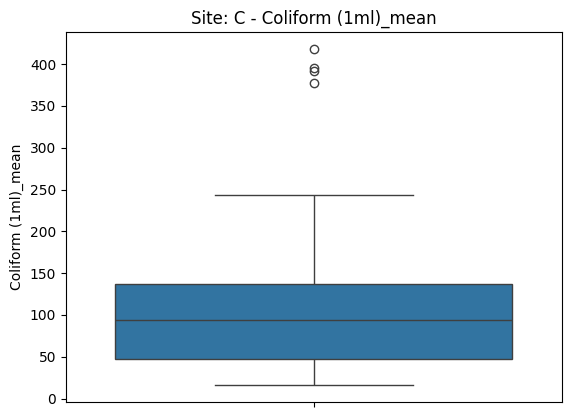

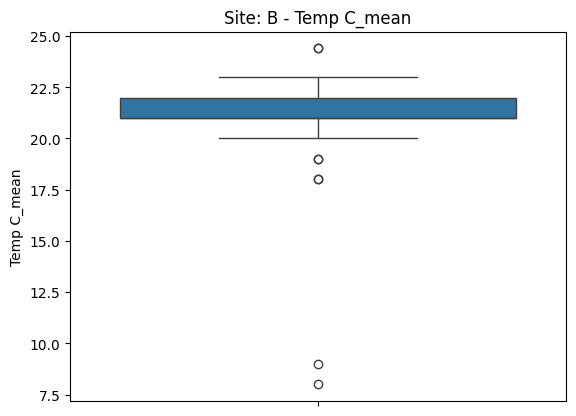

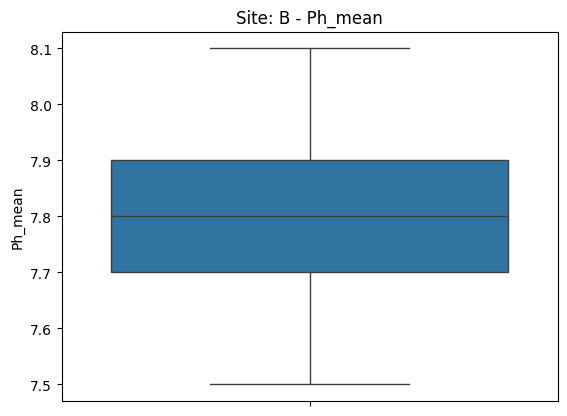

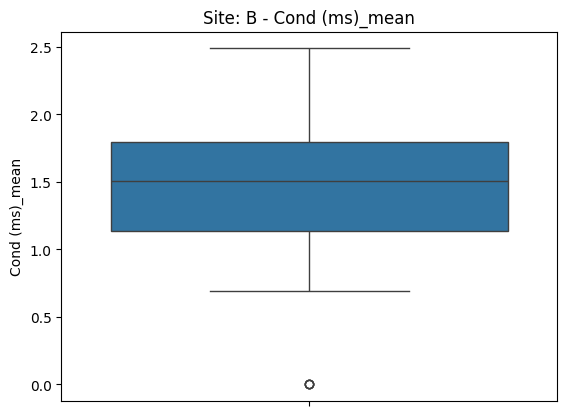

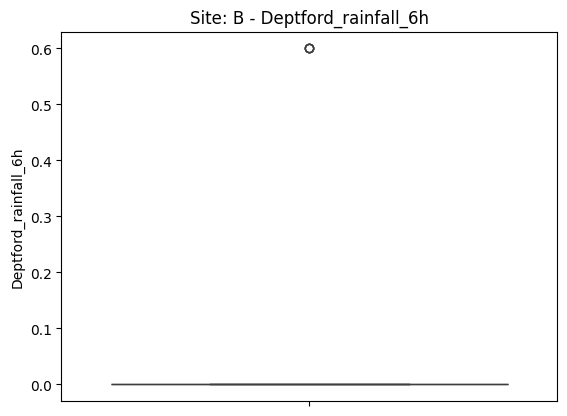

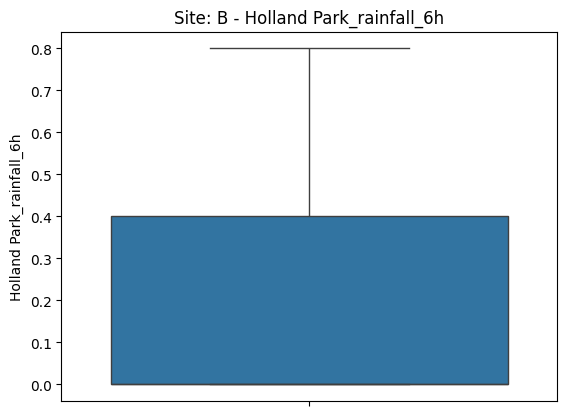

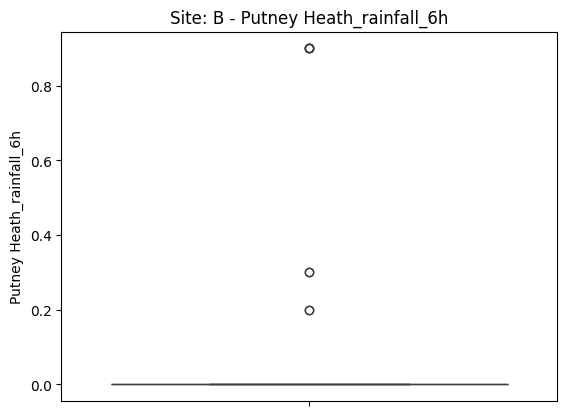

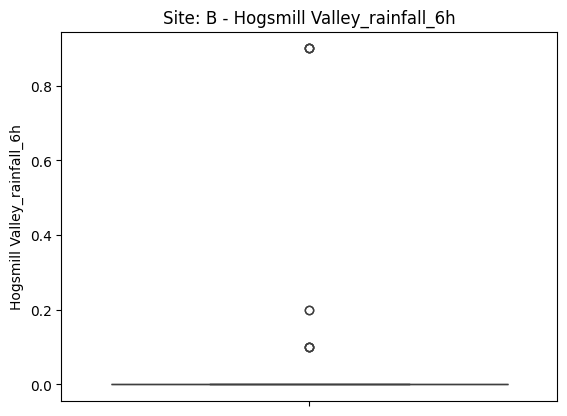

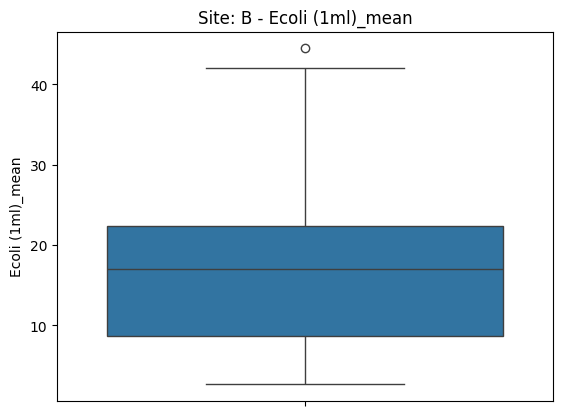

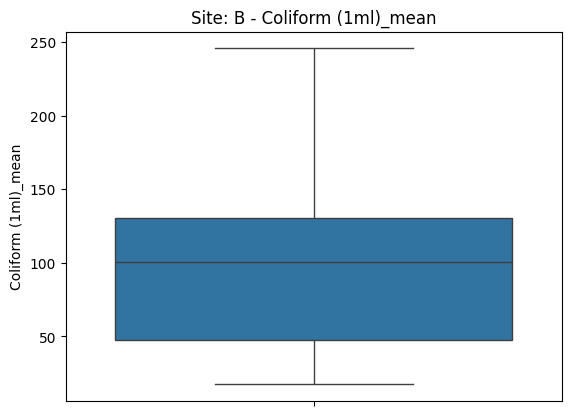

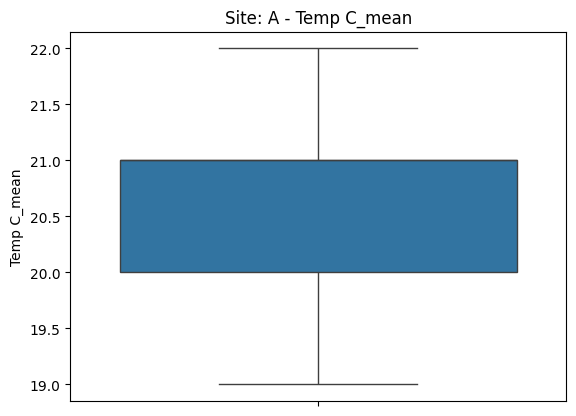

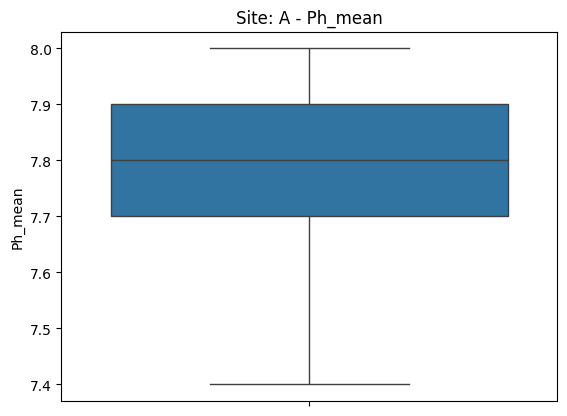

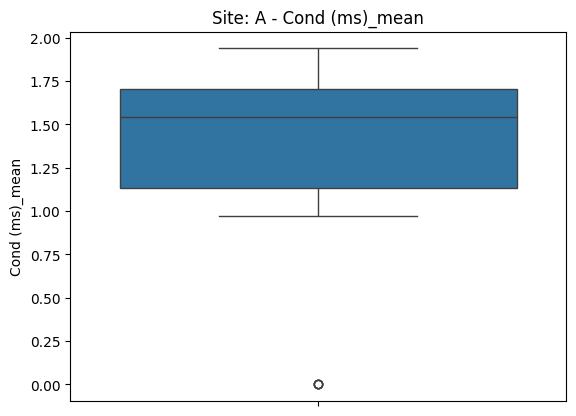

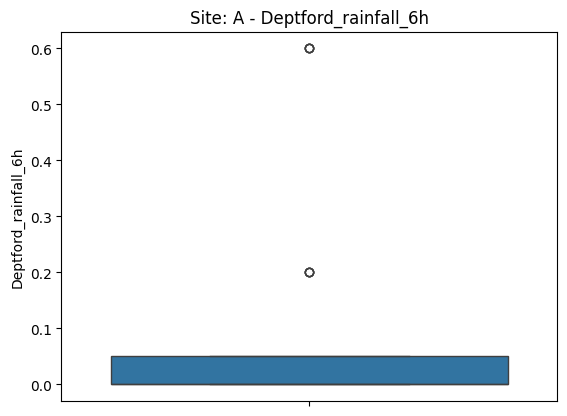

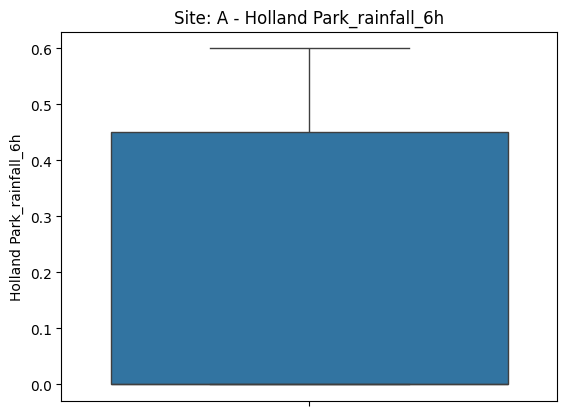

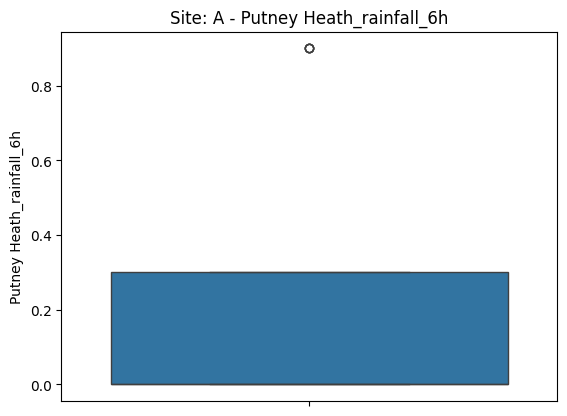

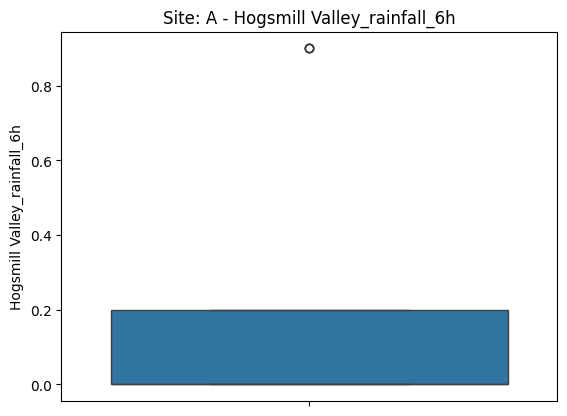

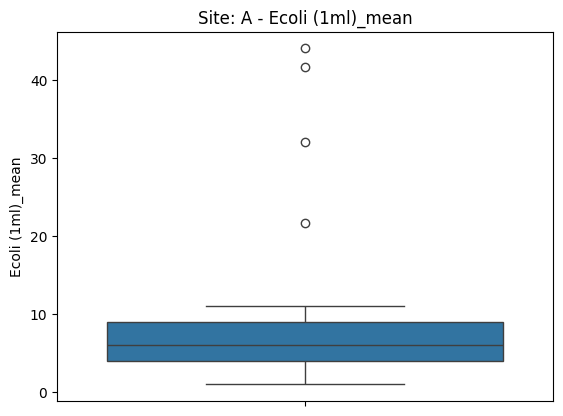

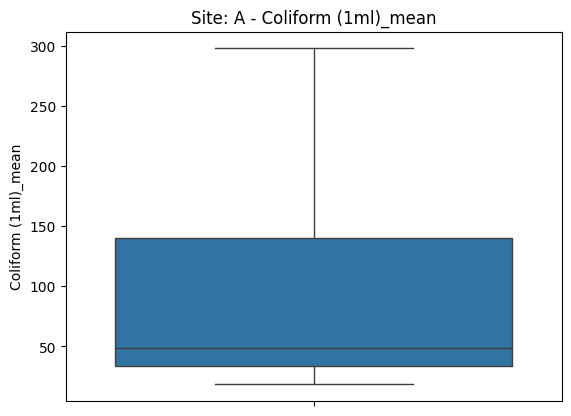

In [36]:
for site in site_dict:
    for col in analyze_columns:
        sns.boxplot(y=site_dict[site][col], orient="v")
        plt.title("Site: " + site + " - " + col)
        plt.show()

## Timeseries

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


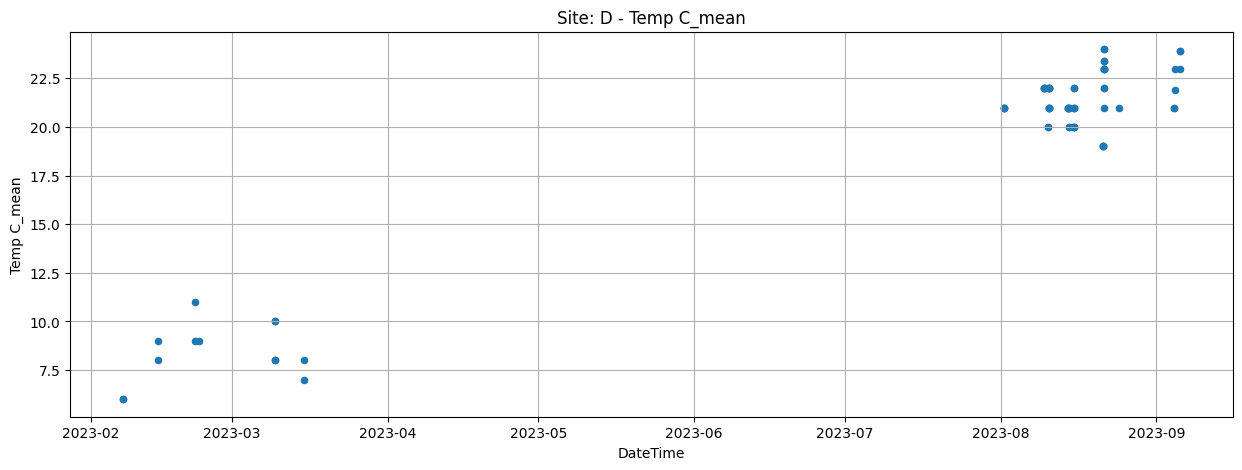

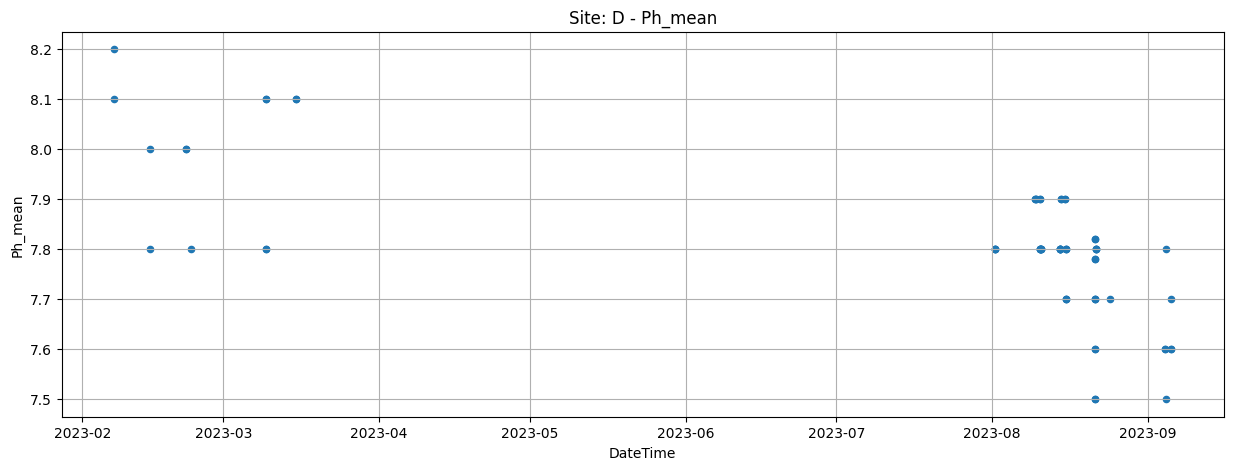

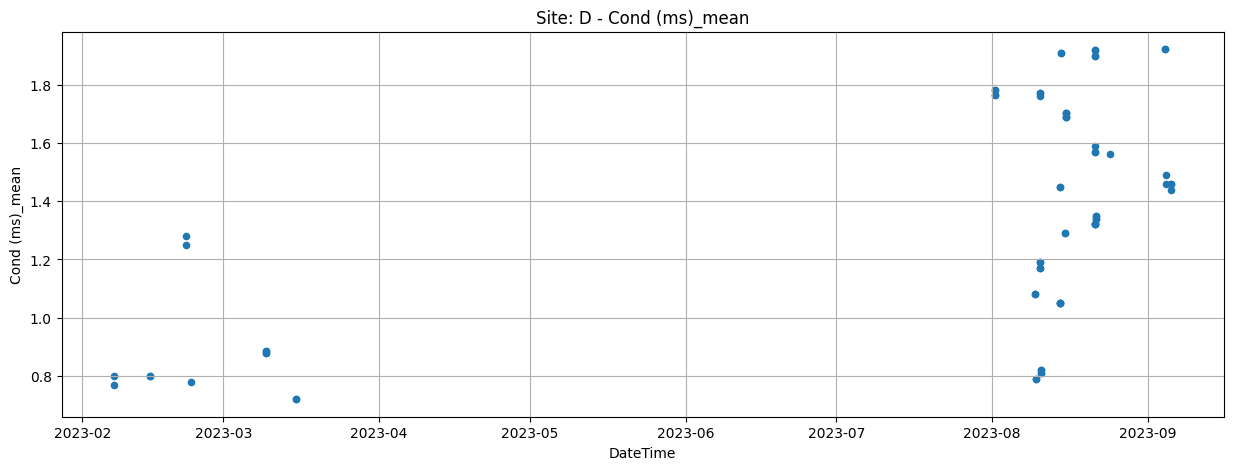

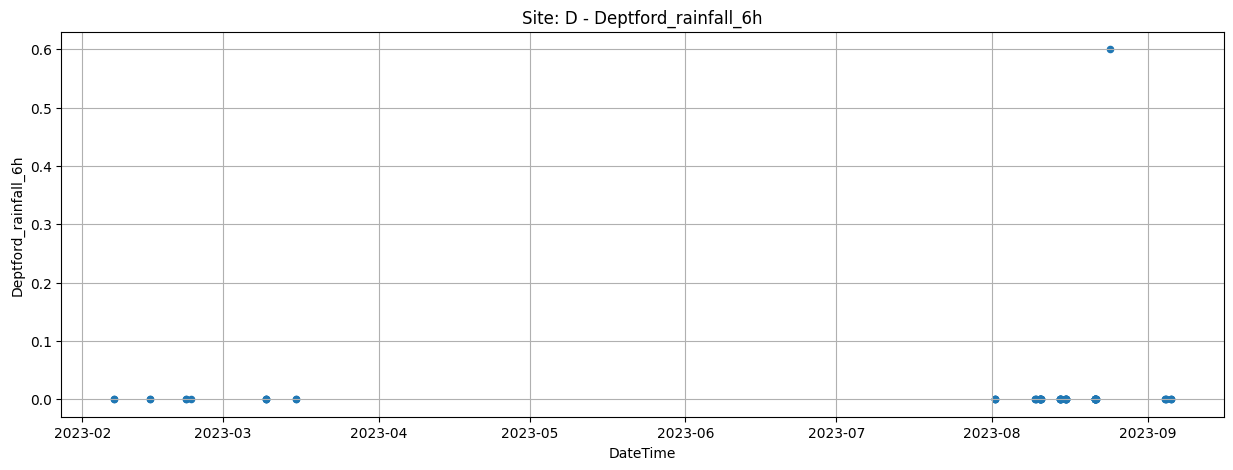

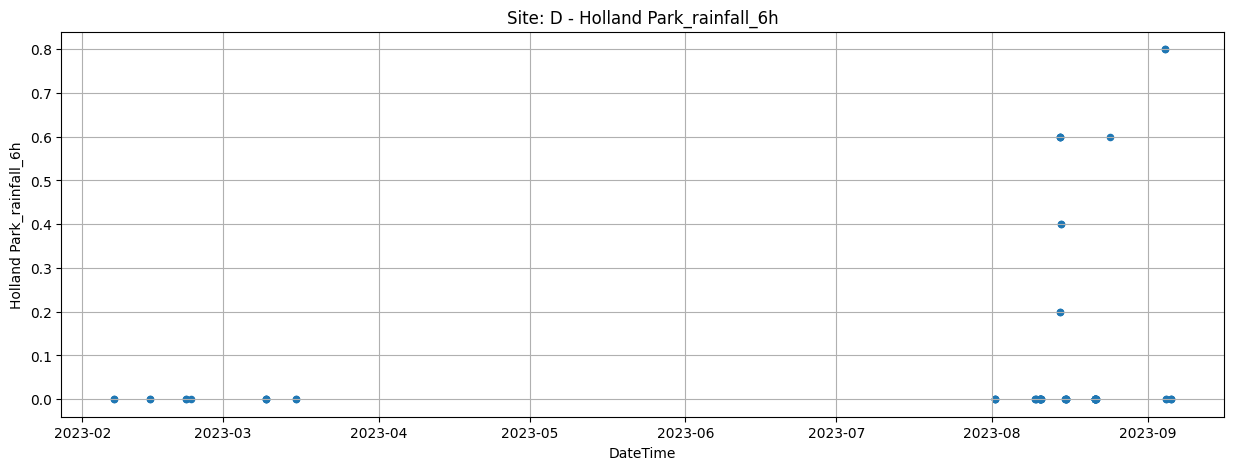

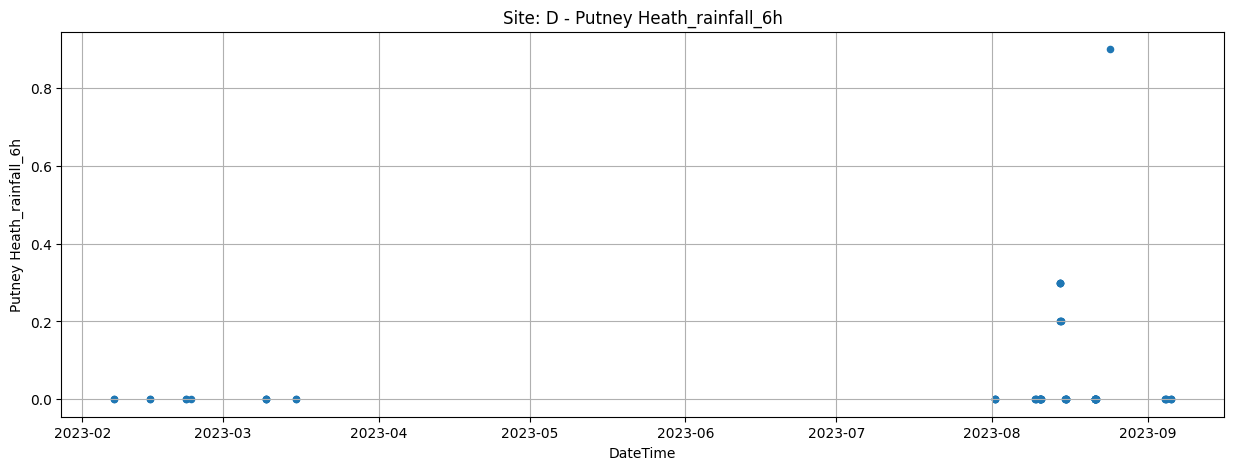

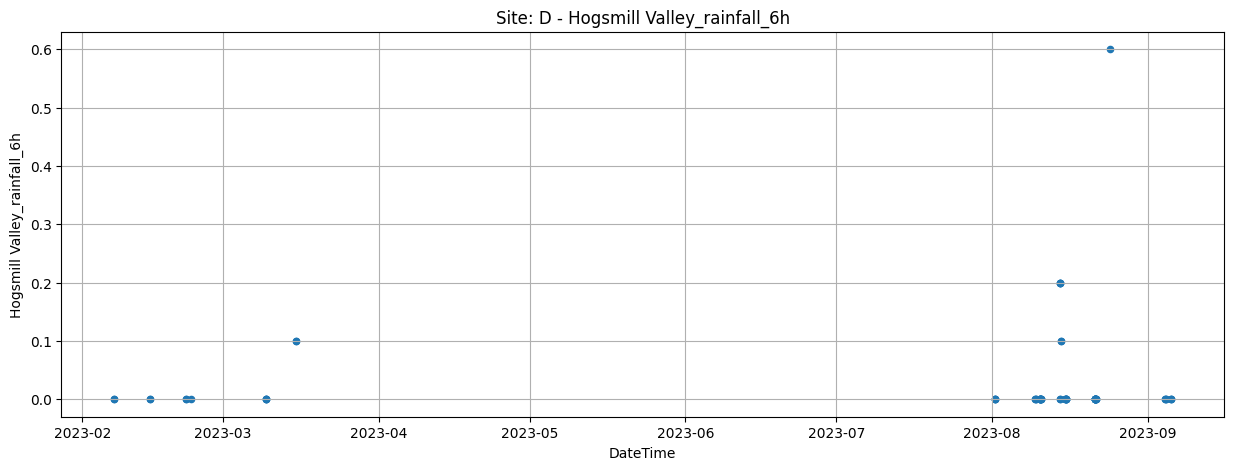

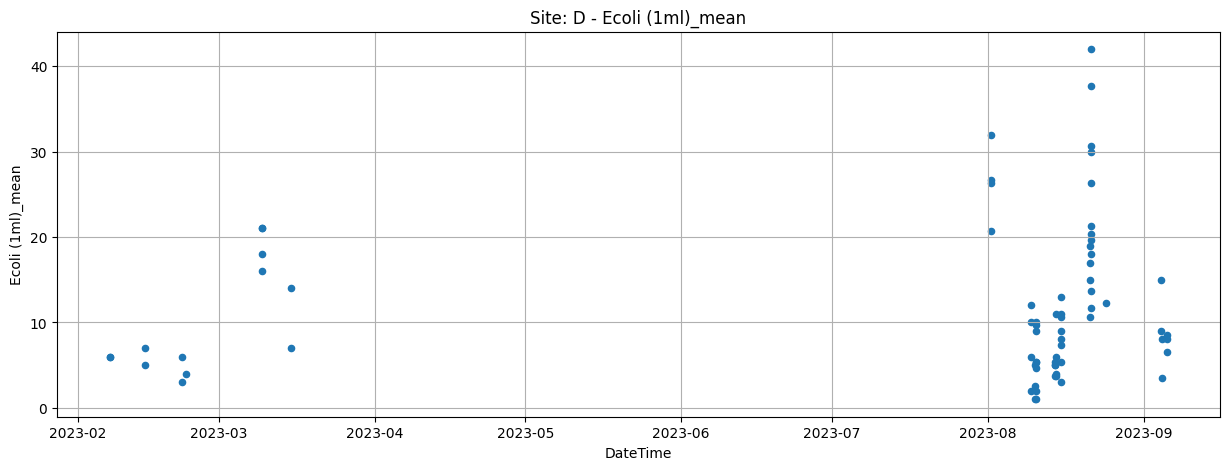

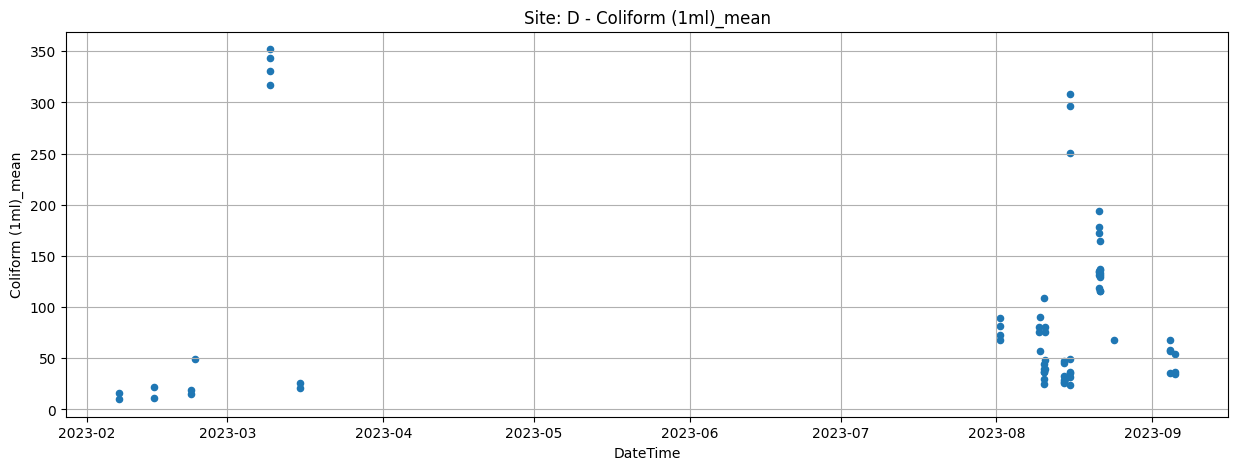

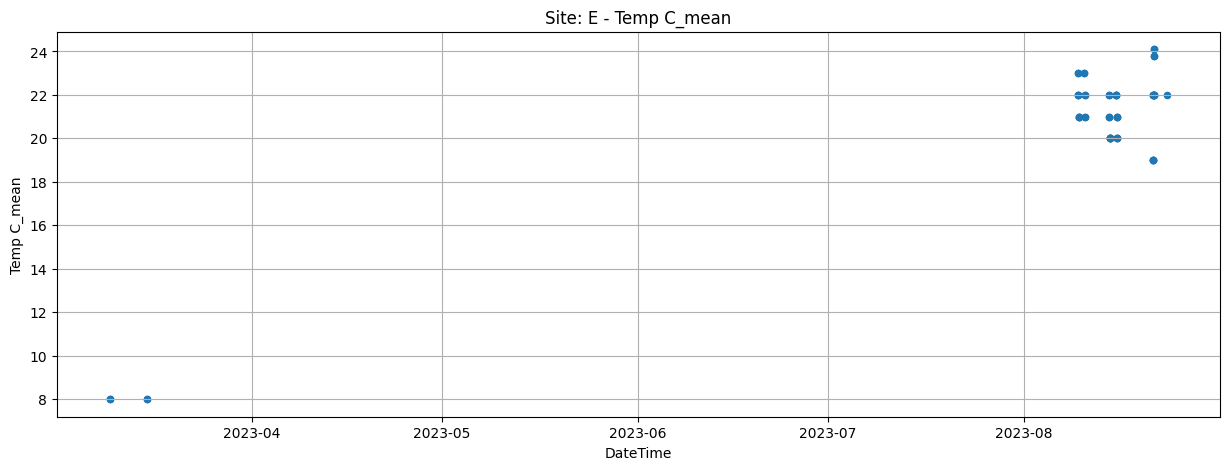

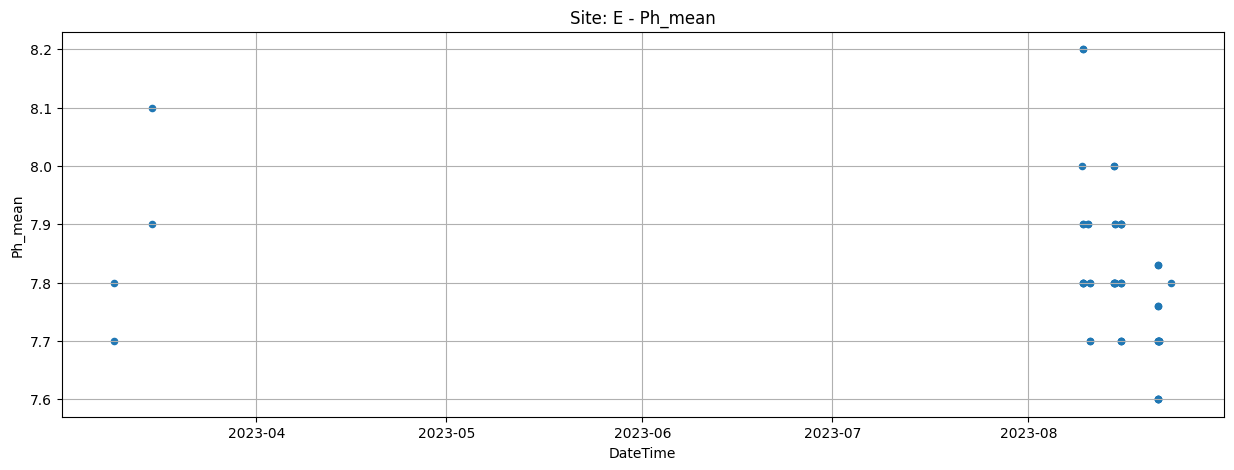

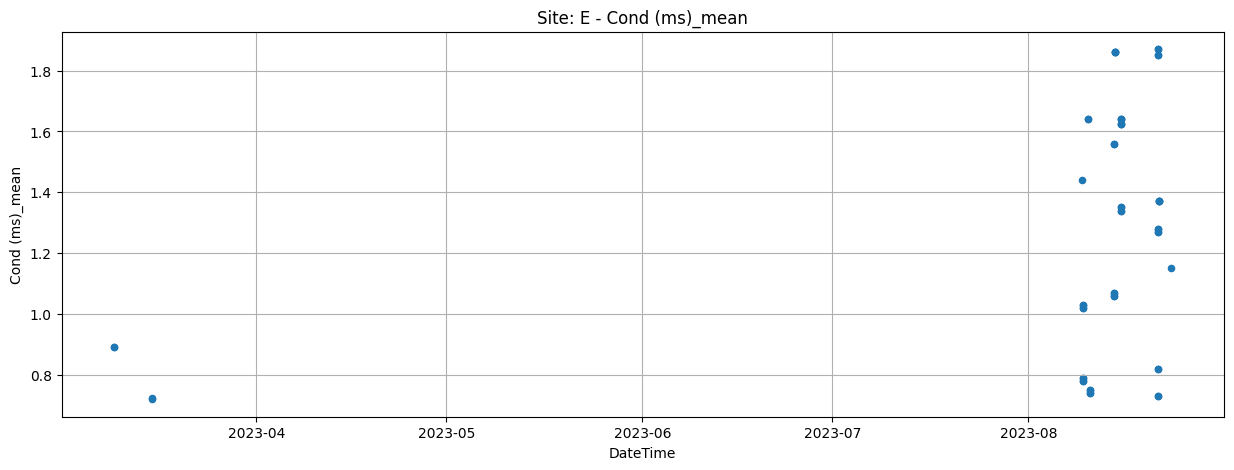

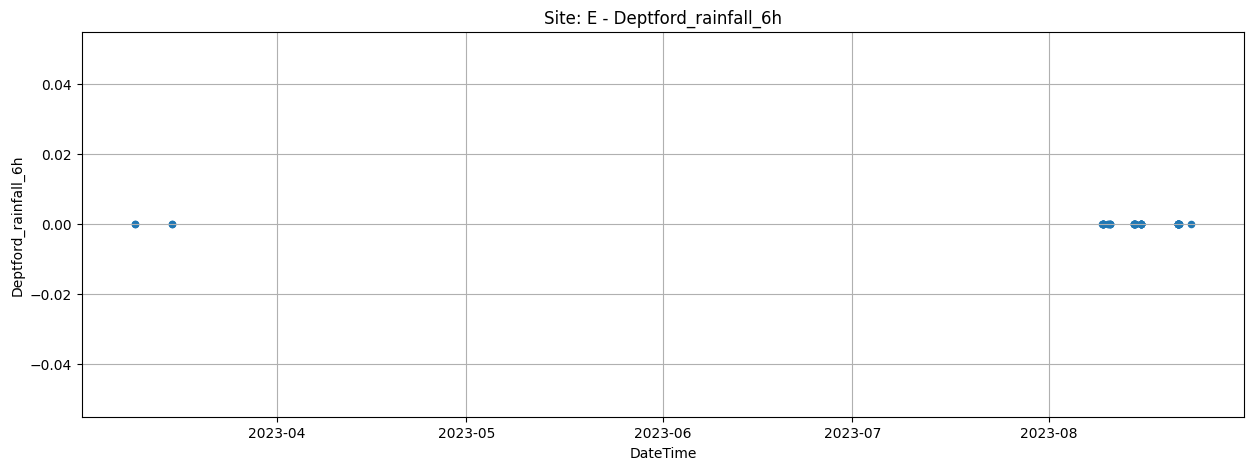

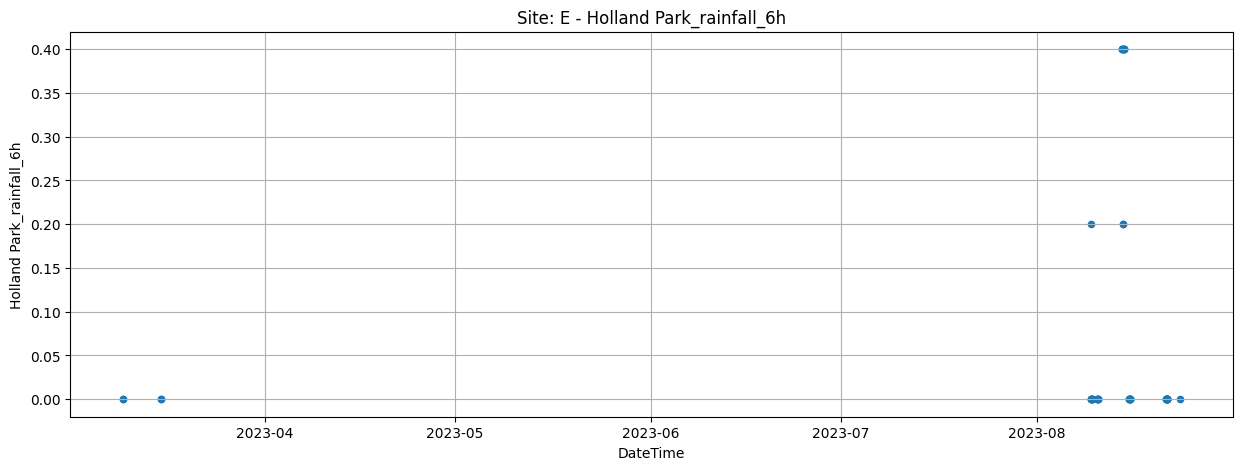

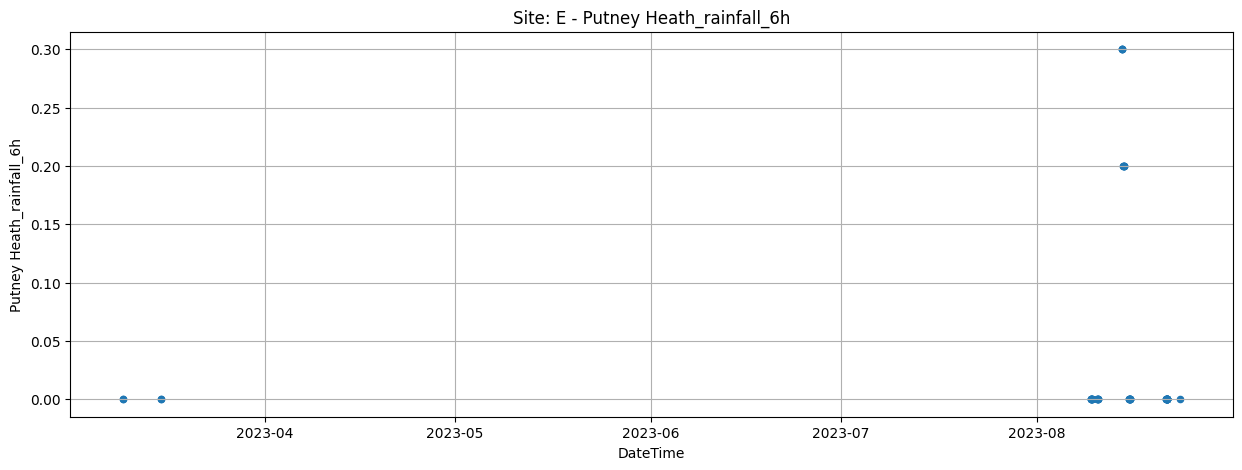

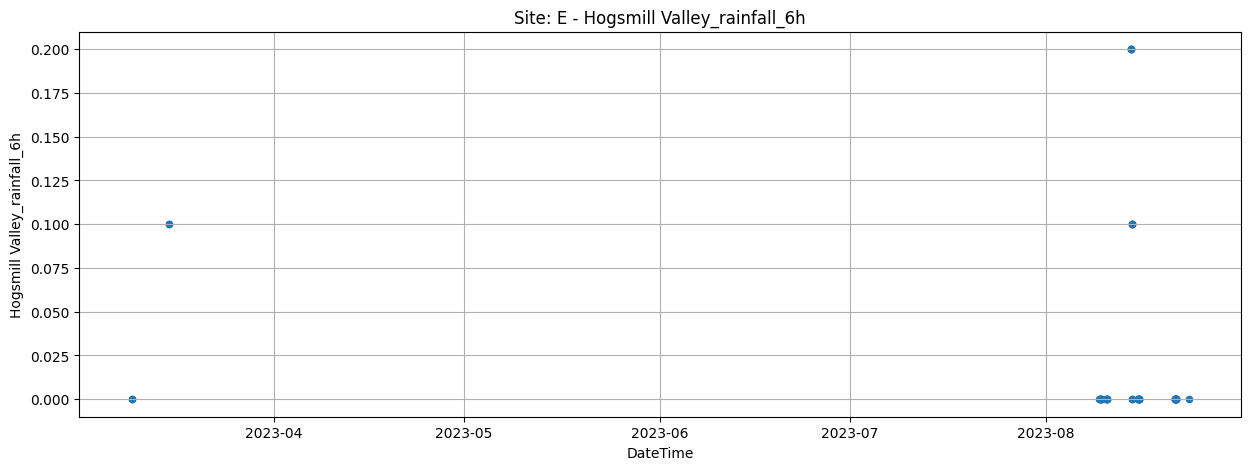

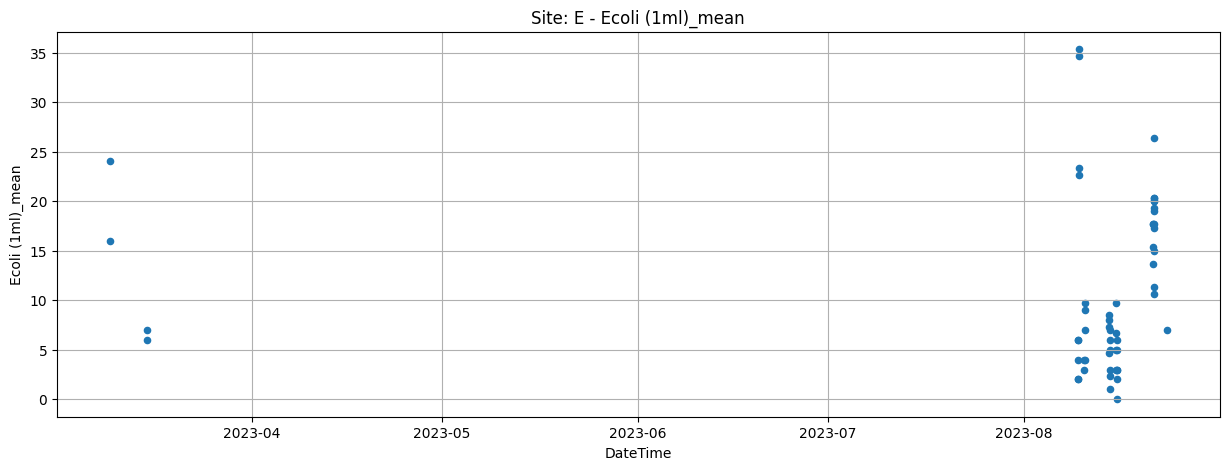

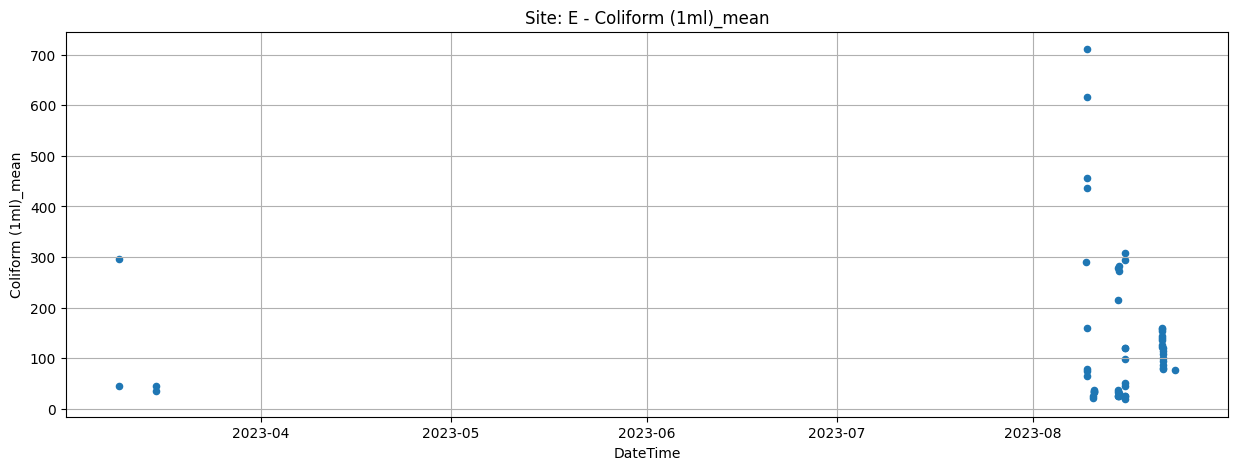

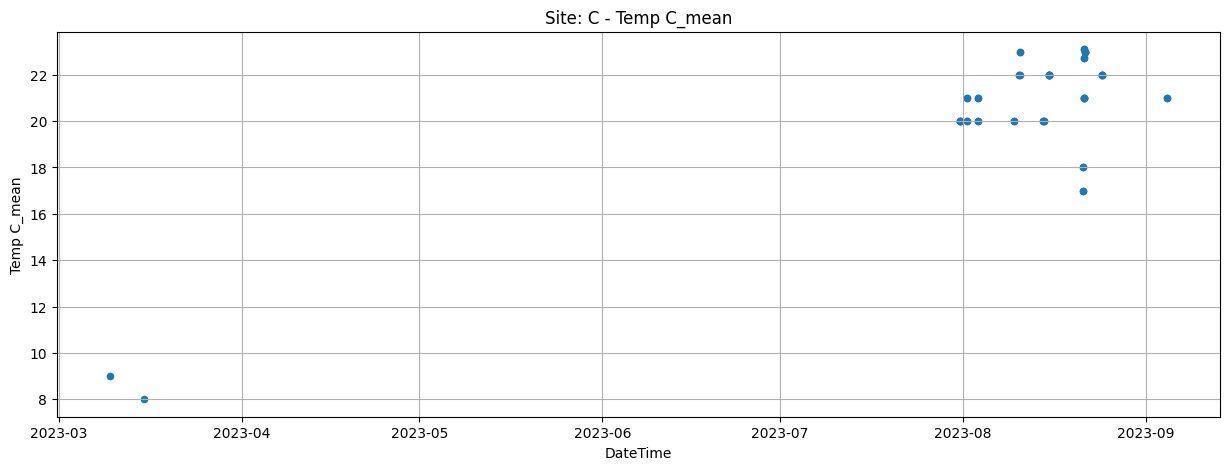

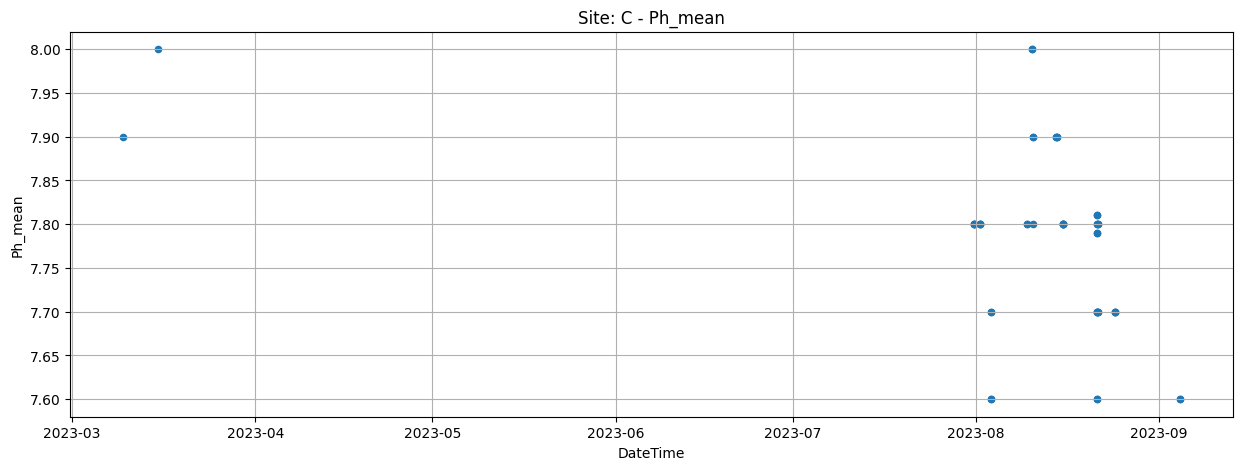

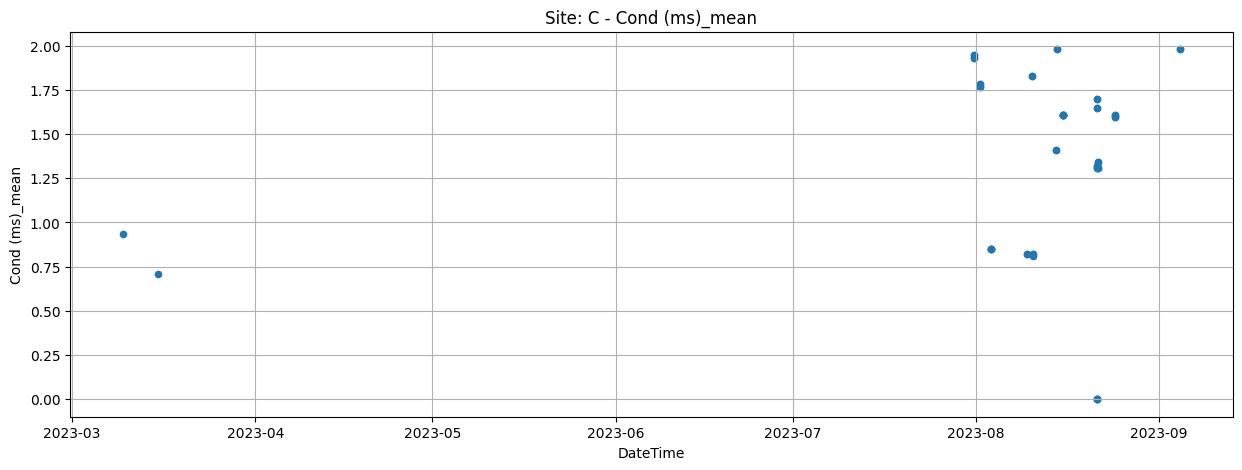

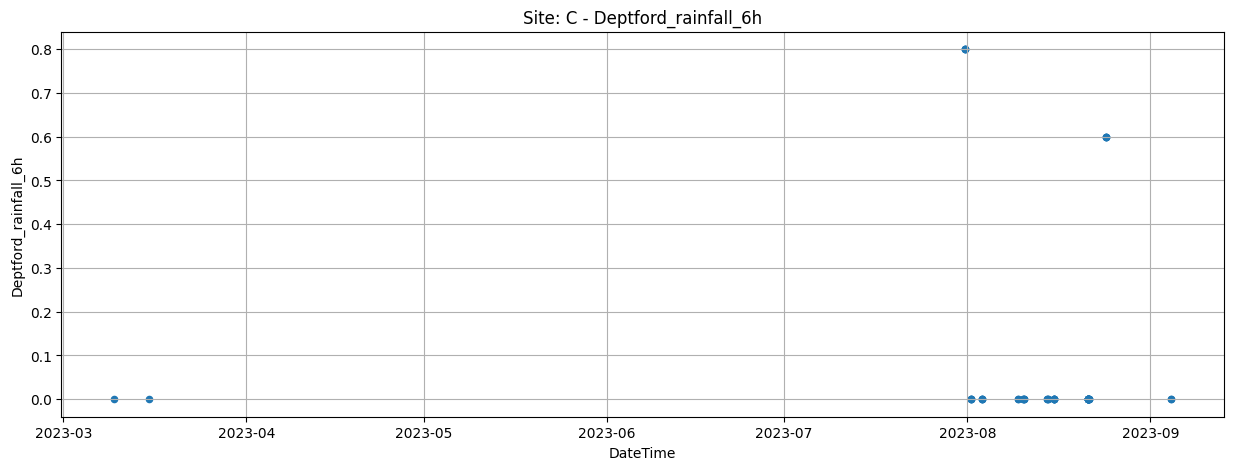

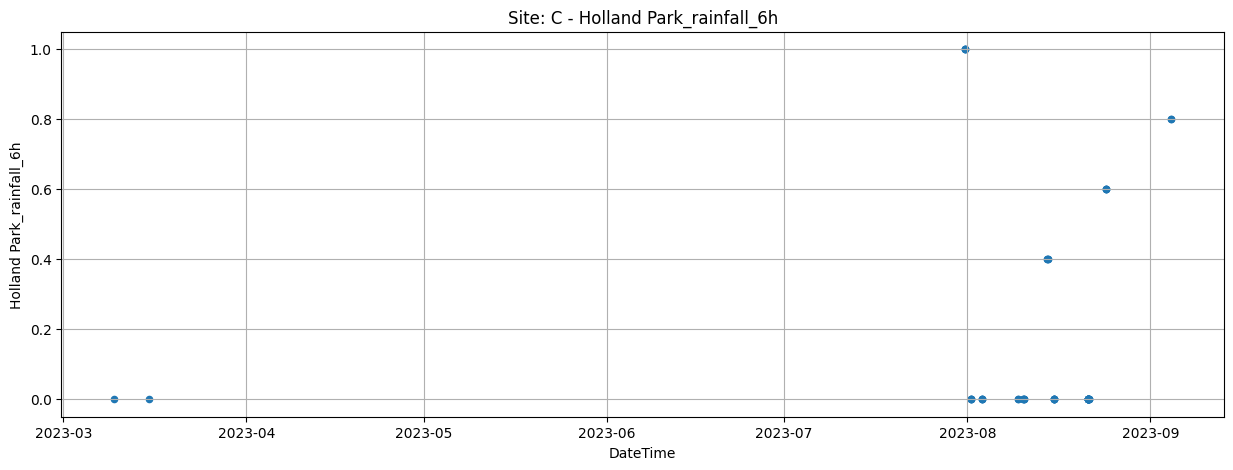

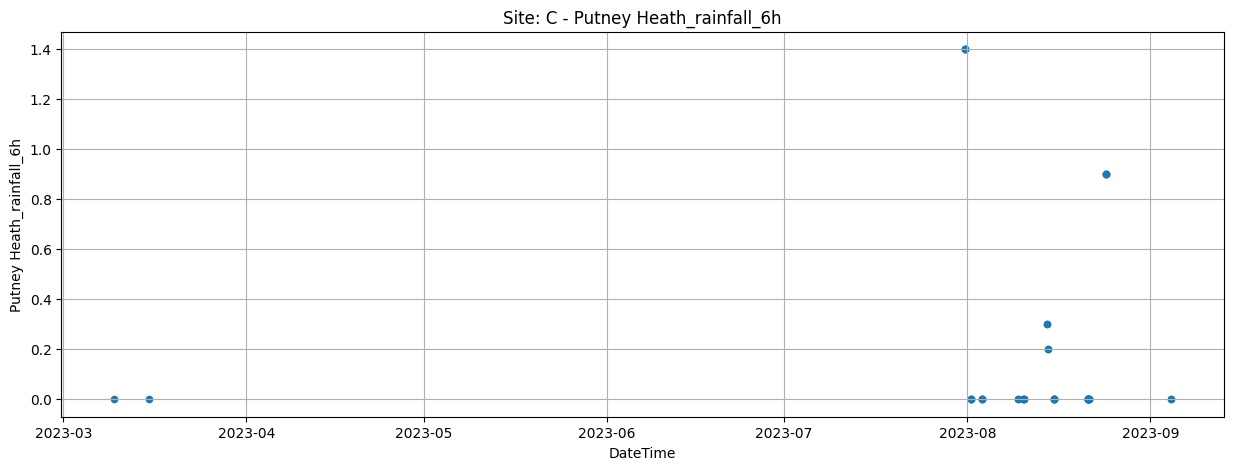

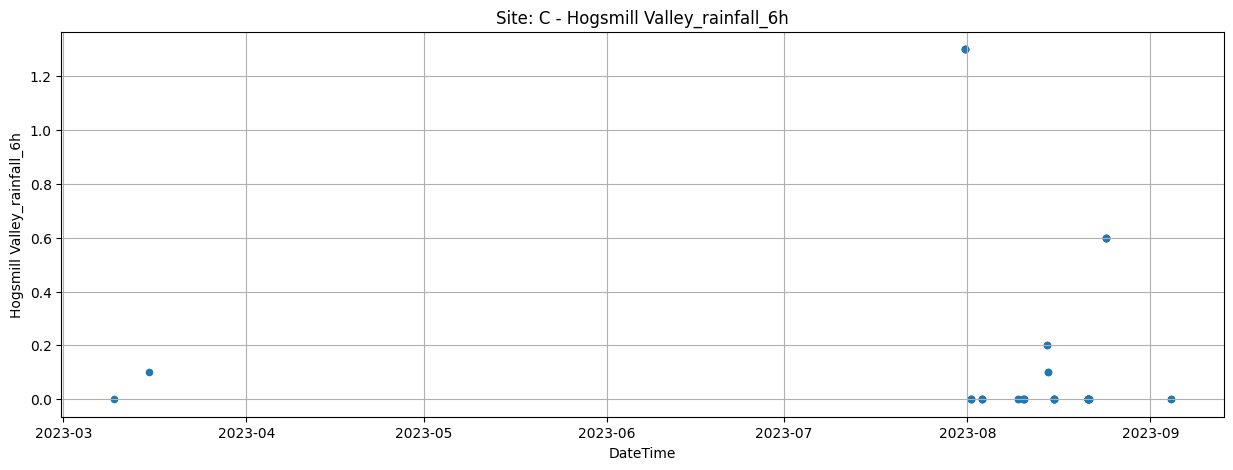

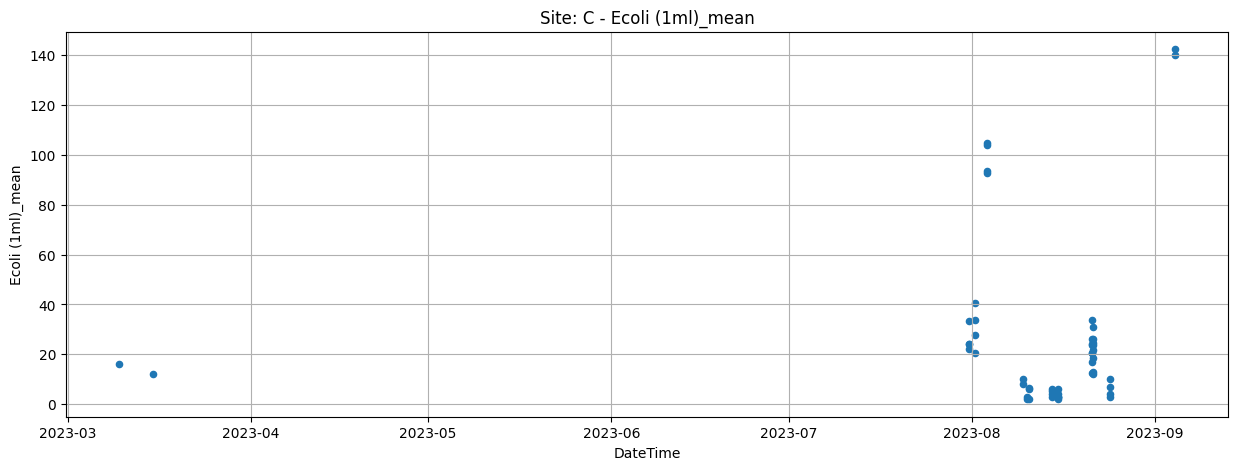

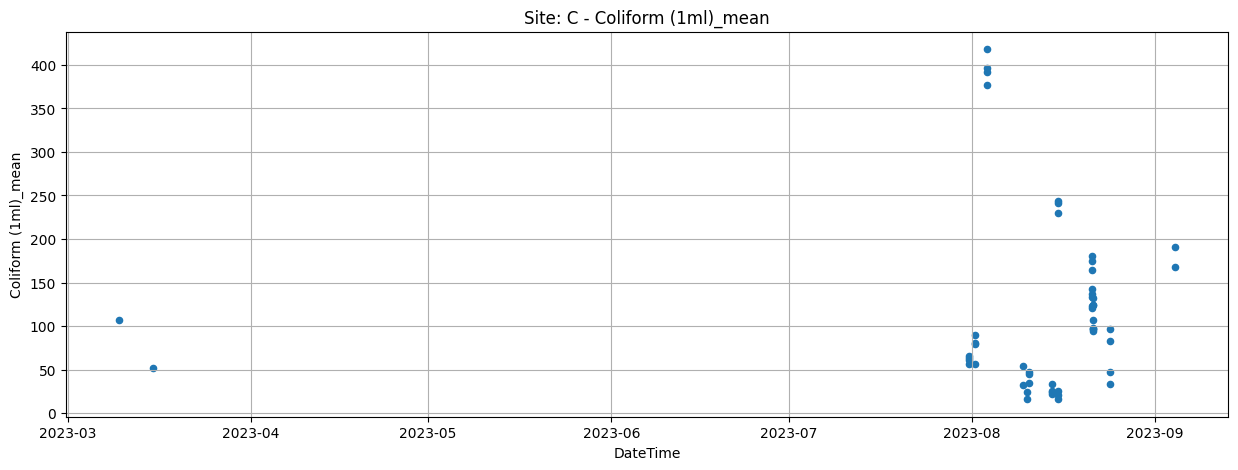

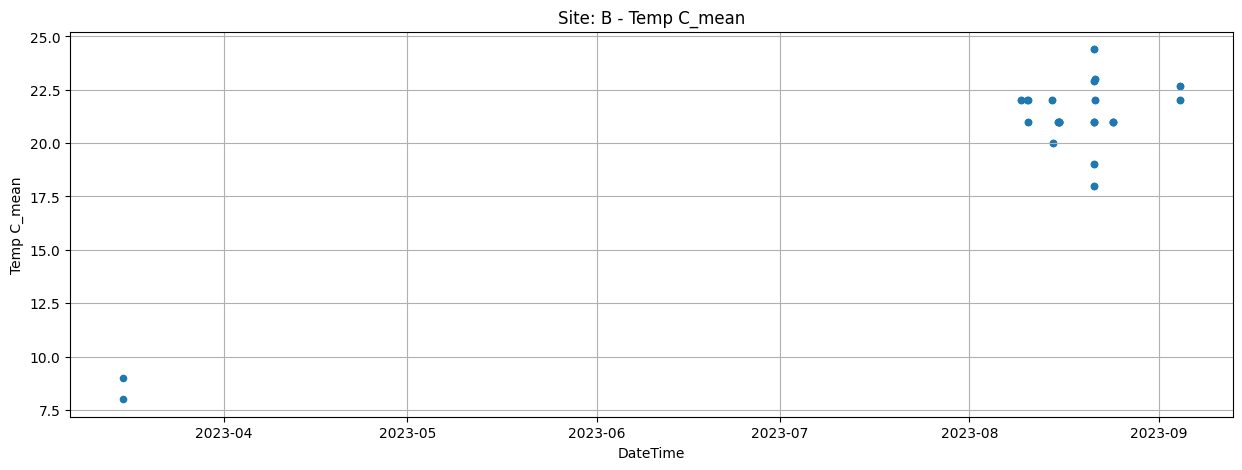

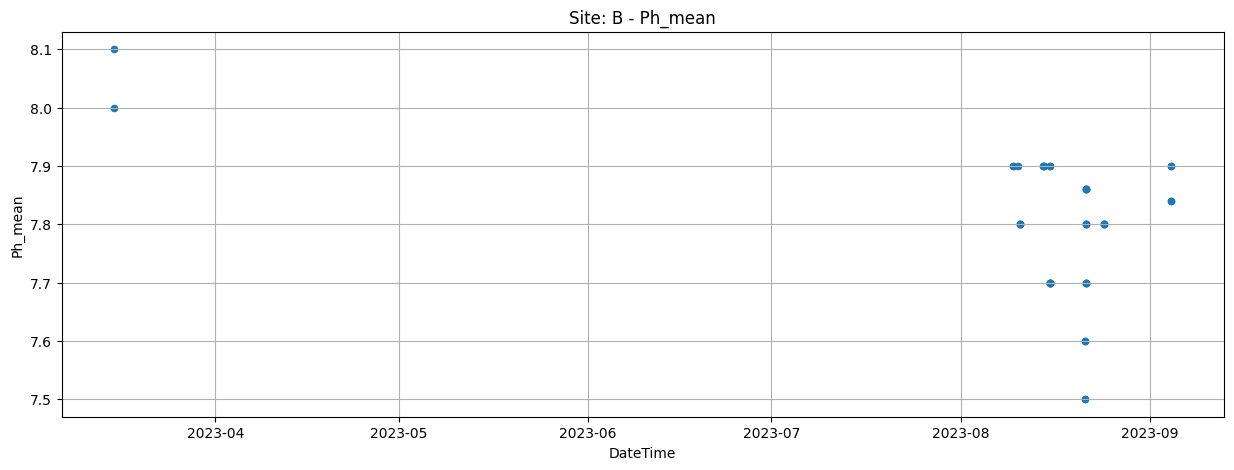

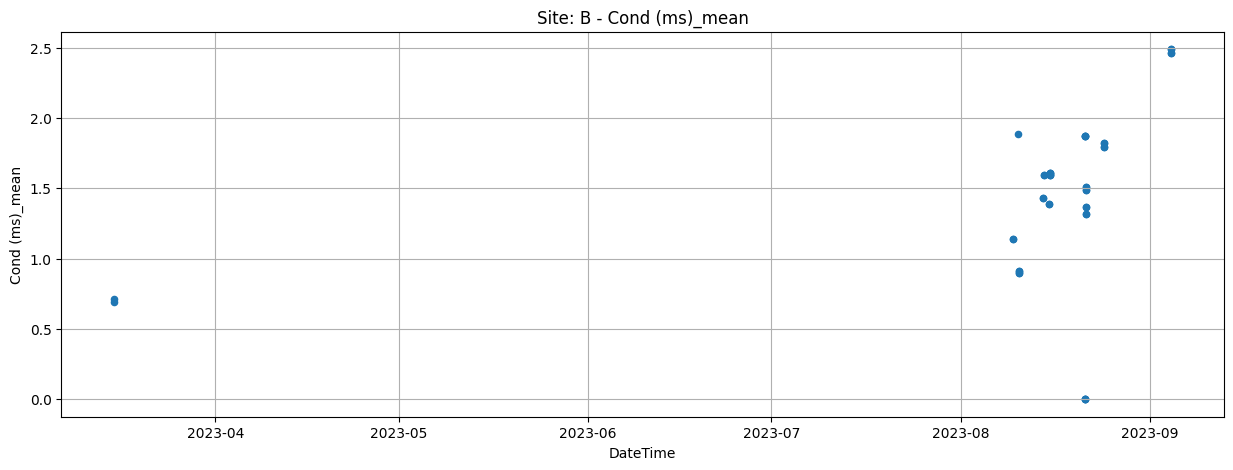

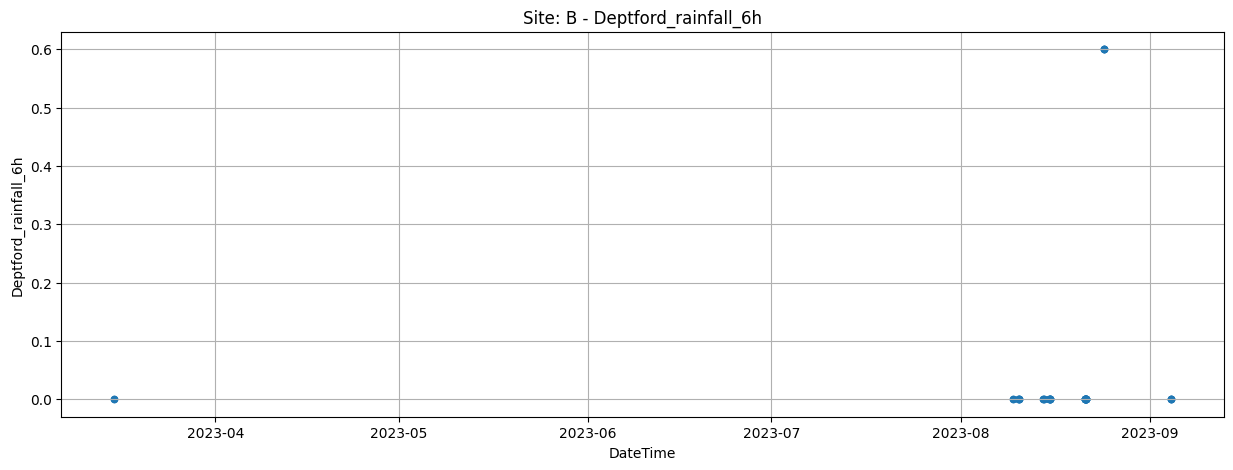

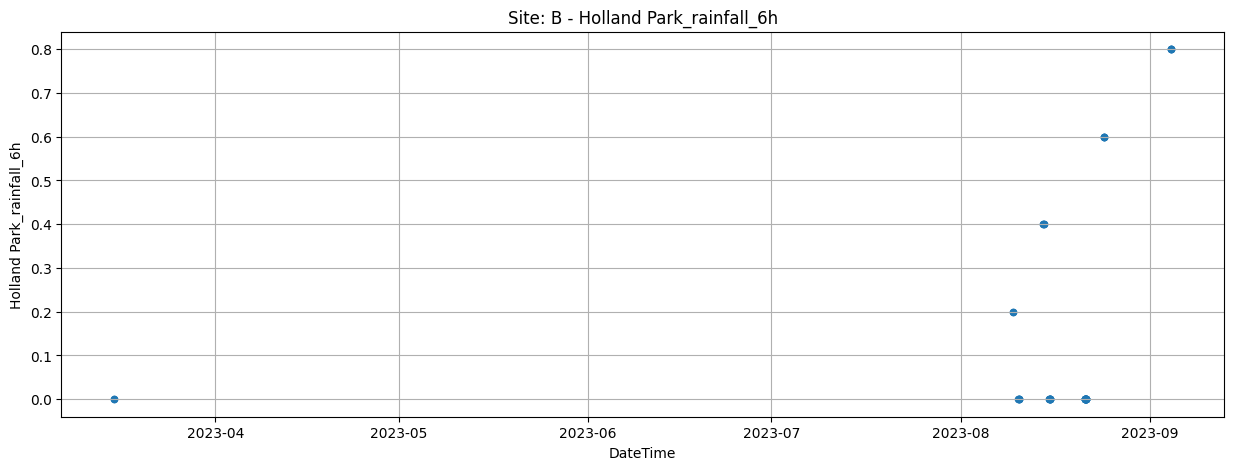

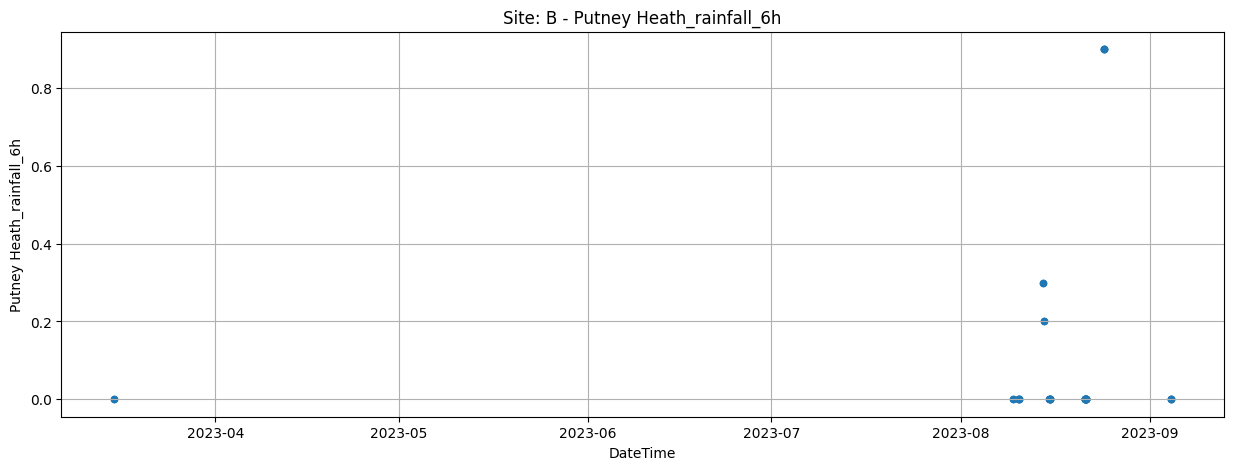

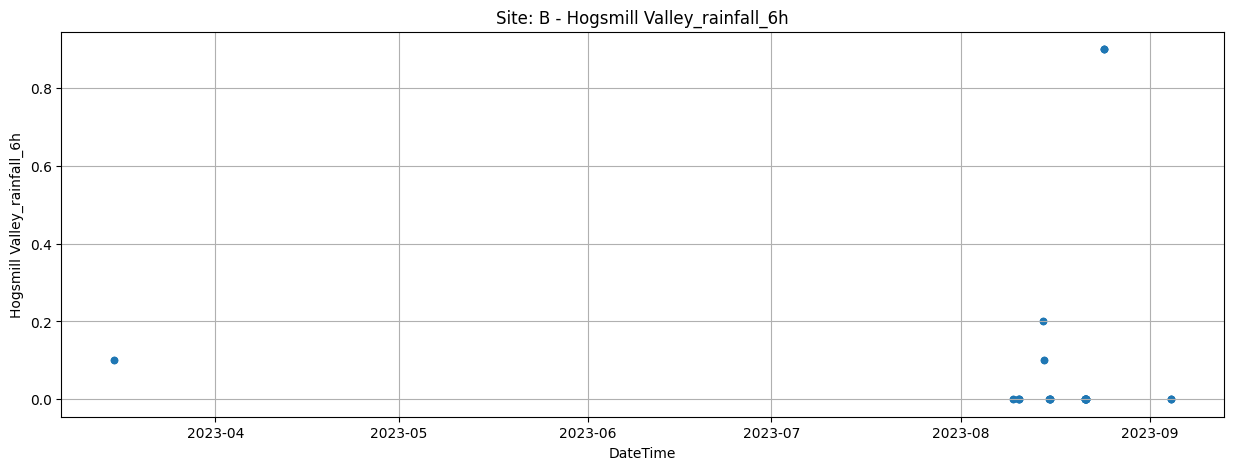

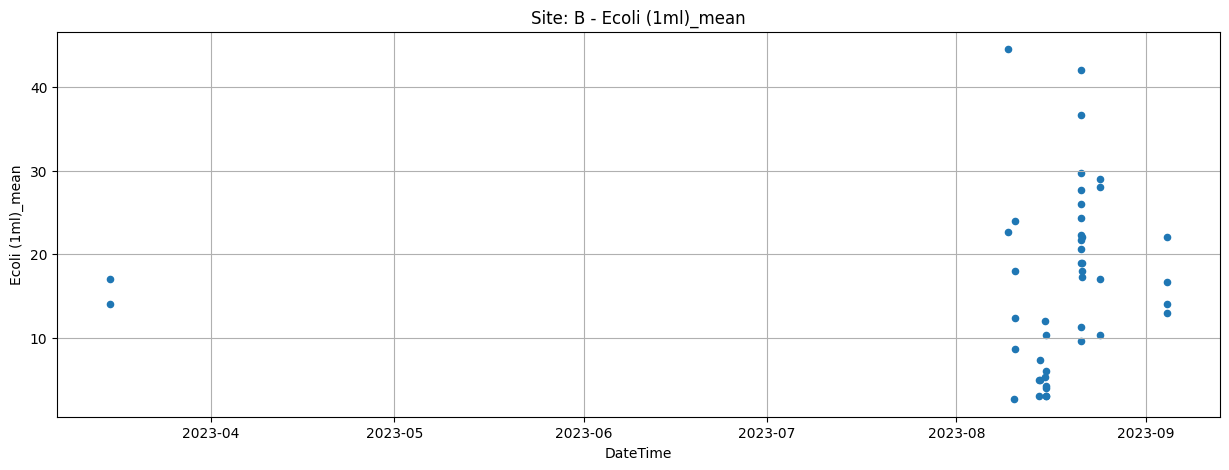

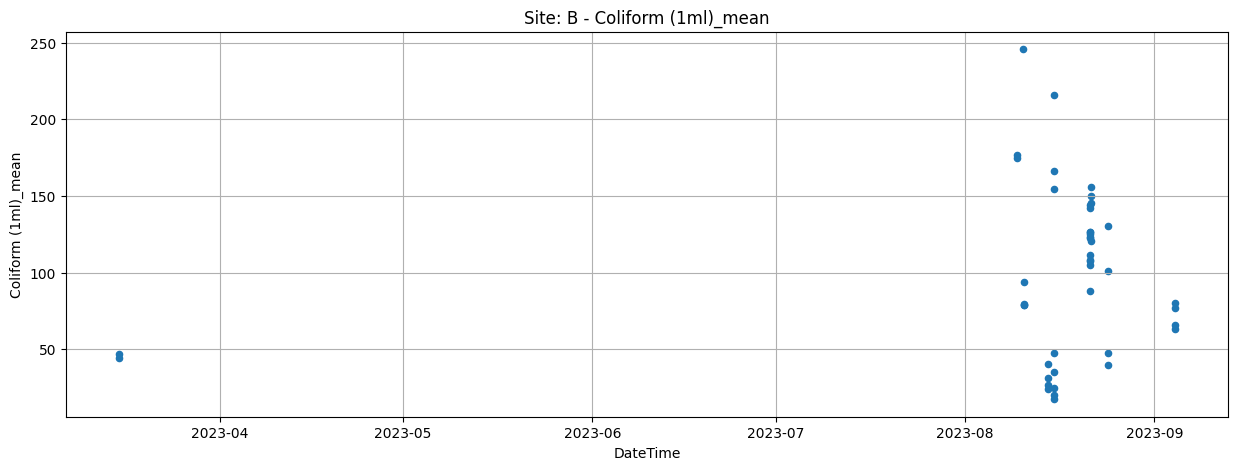

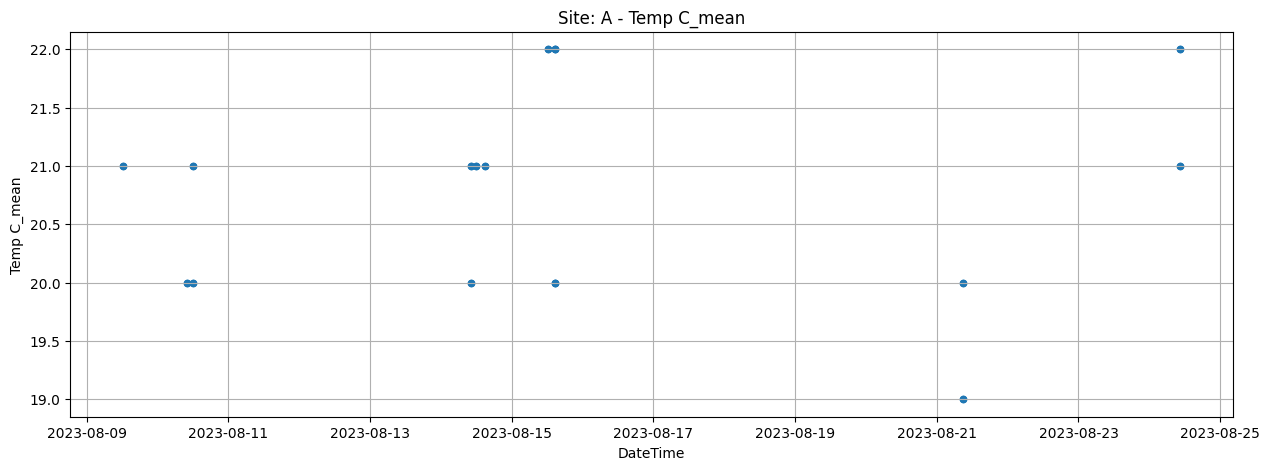

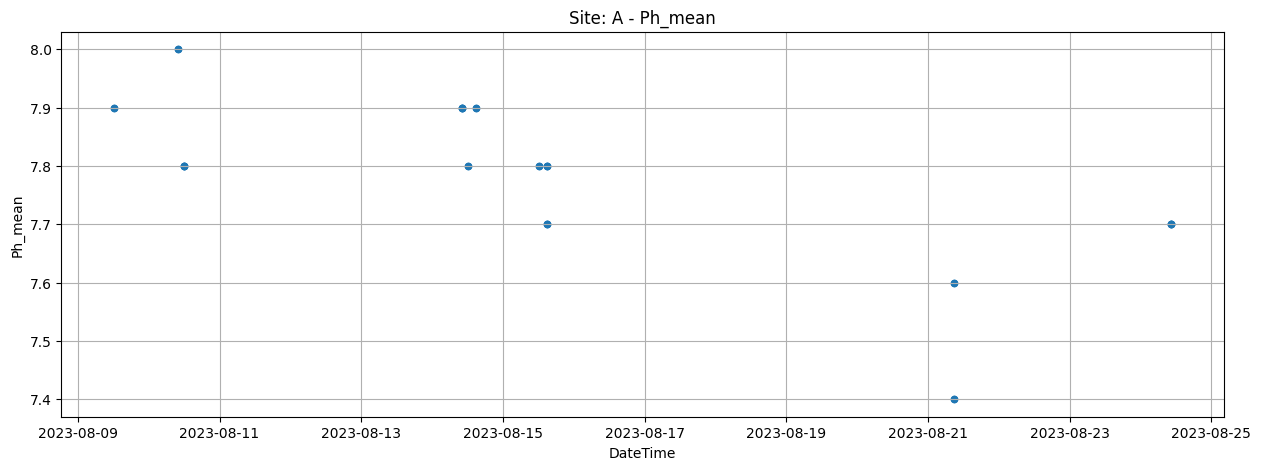

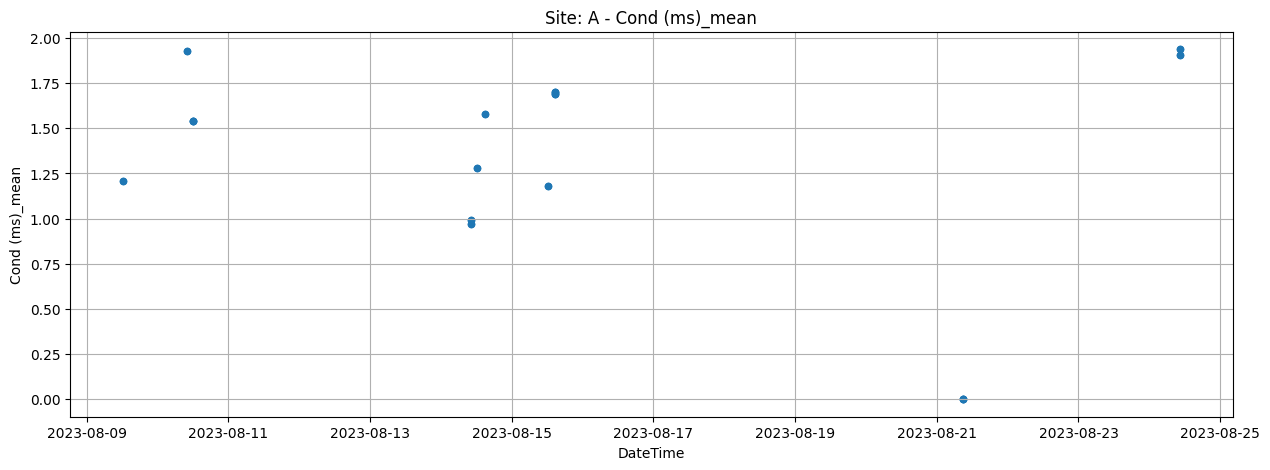

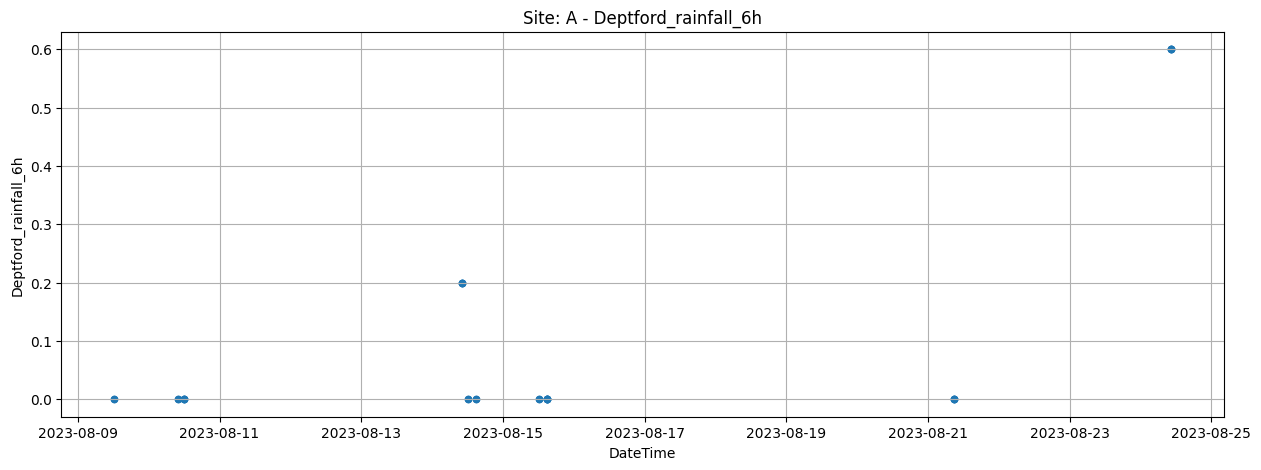

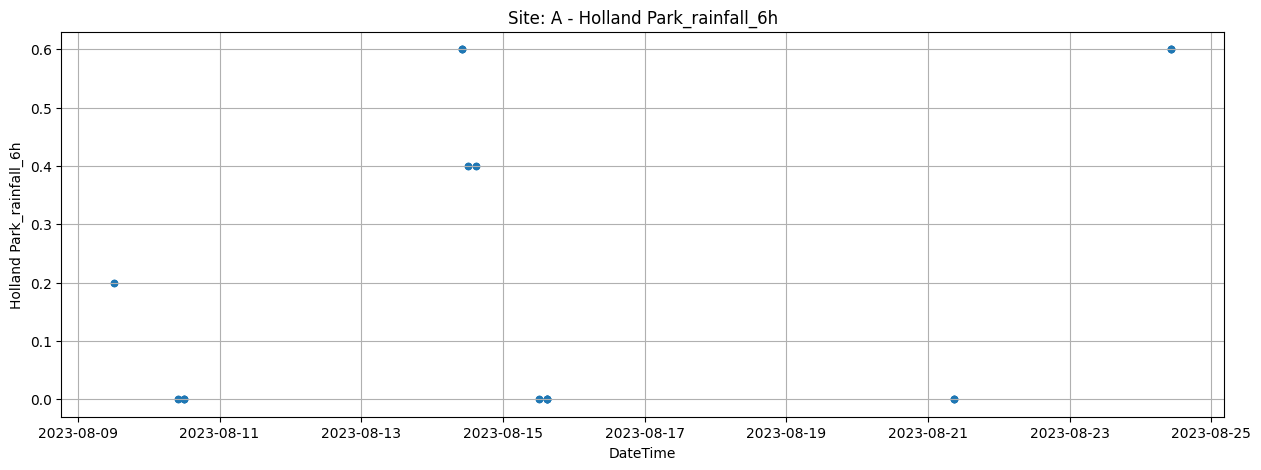

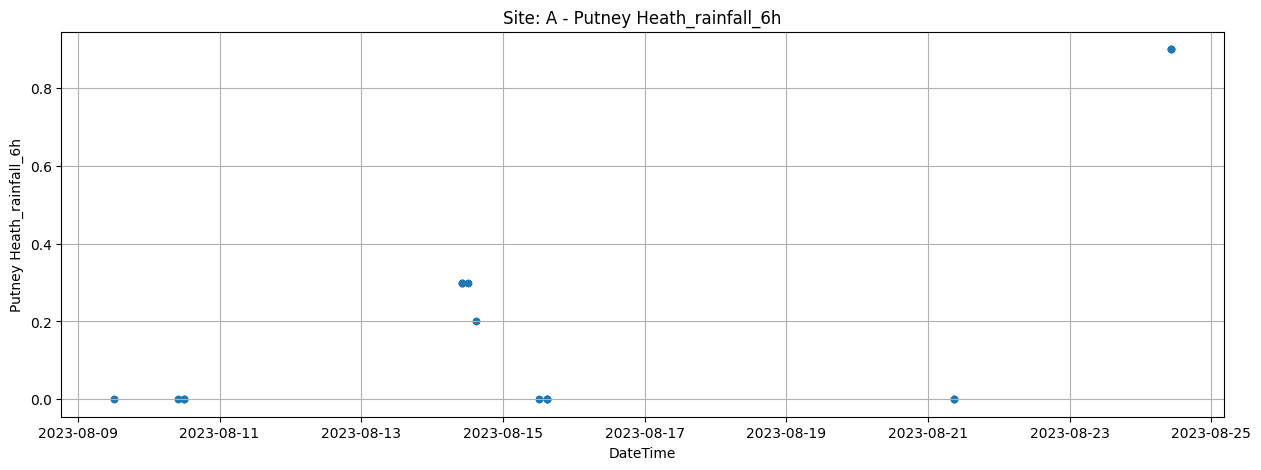

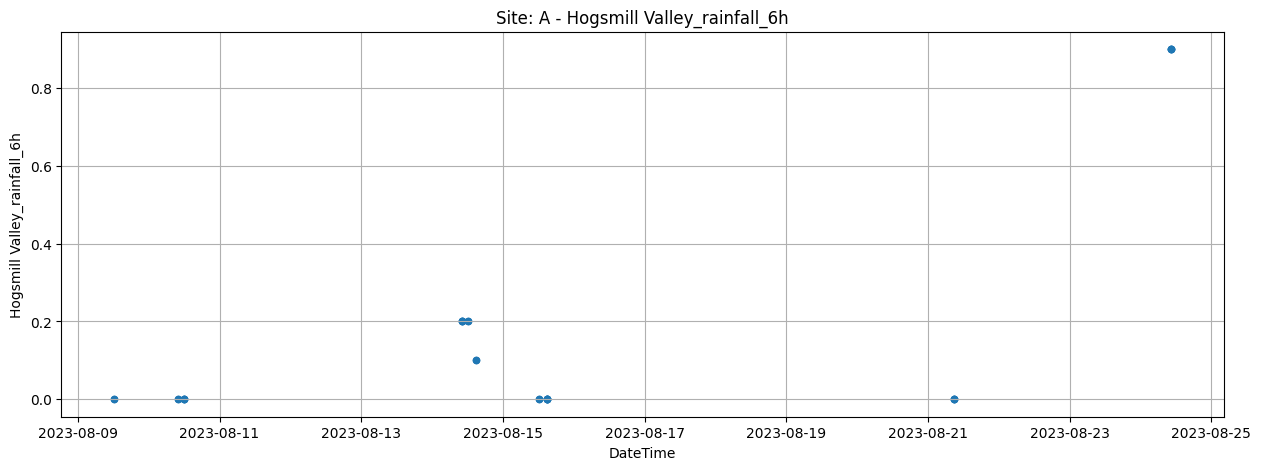

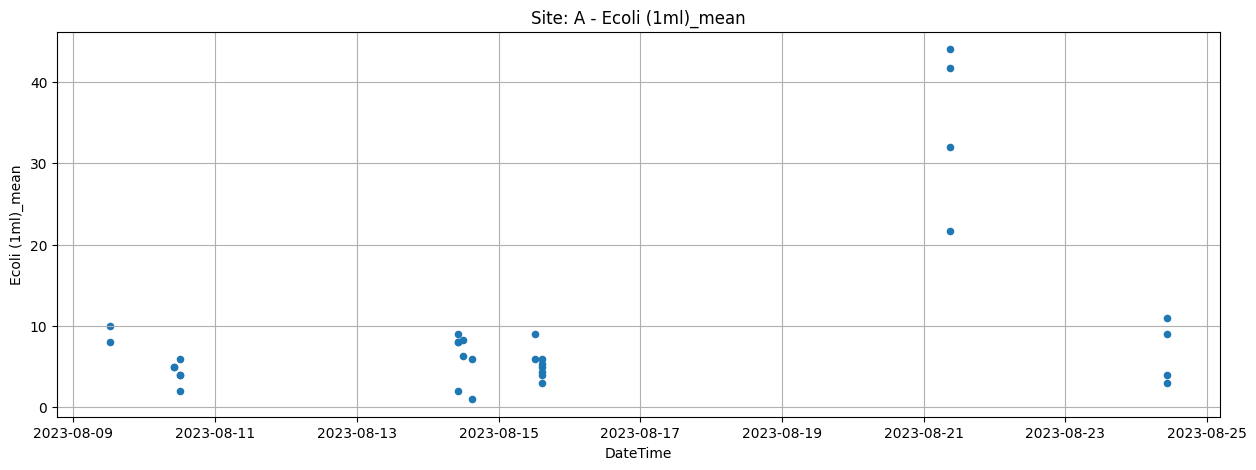

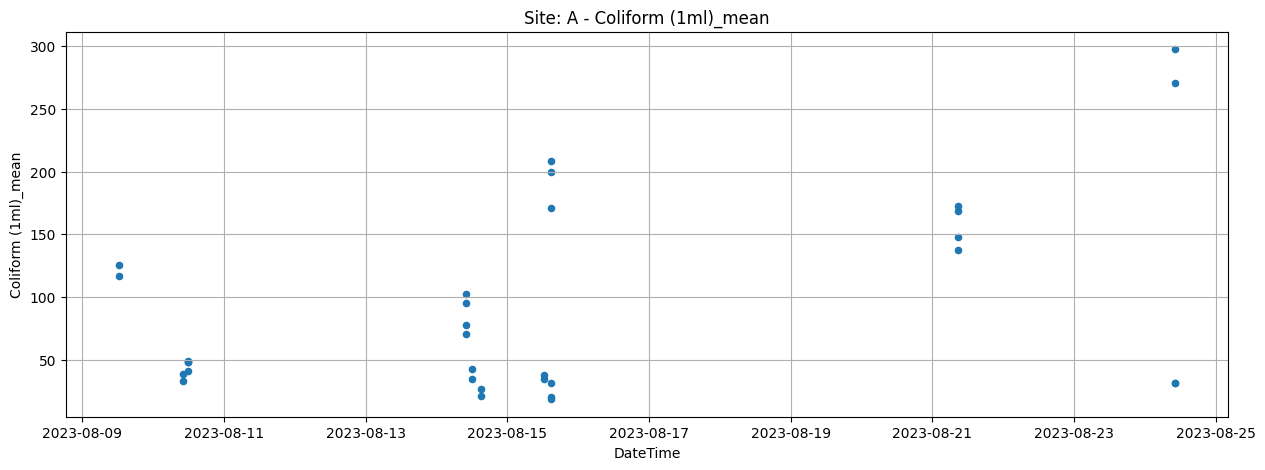

In [37]:
for site in site_dict:
    for col in analyze_columns:
        site_dict[site].plot(
            x="DateTime", y=col, figsize=(15, 5), grid=True, kind="scatter"
        )
        plt.title("Site: " + site + " - " + col)